In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch12. 데이터 시각화</font></b>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 저장 시 해상도 높게
%config InlineBackend.figure_format = 'retina'
# 한글 기본 설정(windows)
plt.rc('font', family='Malgun Gothic') # Windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning 안 보이게 하는 설정
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지가 안 보이게 됨

# 2. seaborn
- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리

    - 공식사이트 : https://seaborn.pydata.org
    - seaborn API : https://seaborn.pydata.org/api.html
- Seaborn으로 그래프 그리기 위한 단계
    1) 데이터 준비<br>
    2) 미적 속성 설정<br>
    3) 함수를 이용하여 그래프 그리기(관계형=수치형, 범주형, 쌍관계, 밀도, 회귀, 다중 그래프)<br>
    4) 그래프 출력(show), 저장(savefig)

## 2.1.데이터 준비하기
- iris, titanic

In [4]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
titanic = sns.load_dataset('titanic')
titanic.head()
# pclass : 티켓class
# sibsp : 동승한 형제나 배우자
# parch : 동승한 부모/자식 수
# embarked : 탑승지
# deck : 데크

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 2.2.미적 속성 설정하기(style, context, palette, figsize,...)
### 1) 그래프 스타일 지정
- white, whitegrid, darkgrid, dark, ticks
### 2) context 지정(배율)
- notebook(기본값 1.0), paper(0.8), talk(1.3), poster(1.8)
### 3) palette 지정
- 교안 21쪽 
    * https://matplotlib.org/stable/tutorials/colors/colormaps.html (colormap)

- 교안 54쪽 
    * https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
    * https://seaborn.pydata.org/tutorial/color_palettes.html

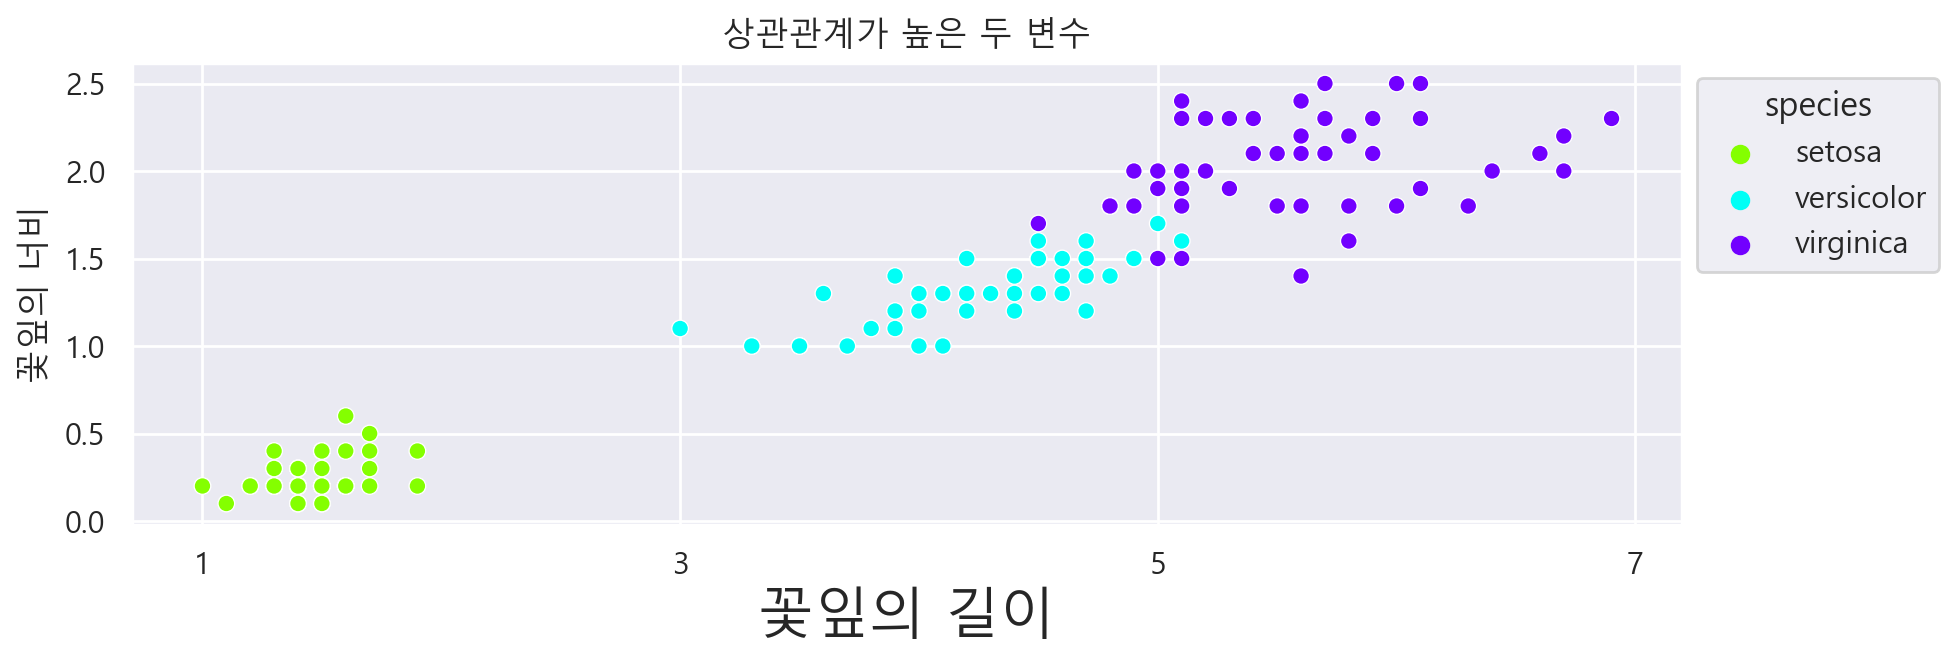

In [29]:
plt.figure(figsize=(10,3))
# 기본 미적 속성 설정
sns.set(style='darkgrid',
        context='notebook',
        palette='Set2',
       rc={'figure.figsize':(10,3)}) # runtime configuration
plt.rc('font', family='Malgun Gothic') # Windows
plt.rc('axes', unicode_minus=False) # 축의 - 기호 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='hsv')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title='상관관계가 높은 두 변수',
      ylabel='꽃잎의 너비')
ax.set_xlabel('꽃잎의 길이', fontsize=20)
ax.set_xticks([1,3,5,7])
plt.show()

## 2.3.seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
- scatterplot, lineplot, relplot(subplot) : x축이 수치형

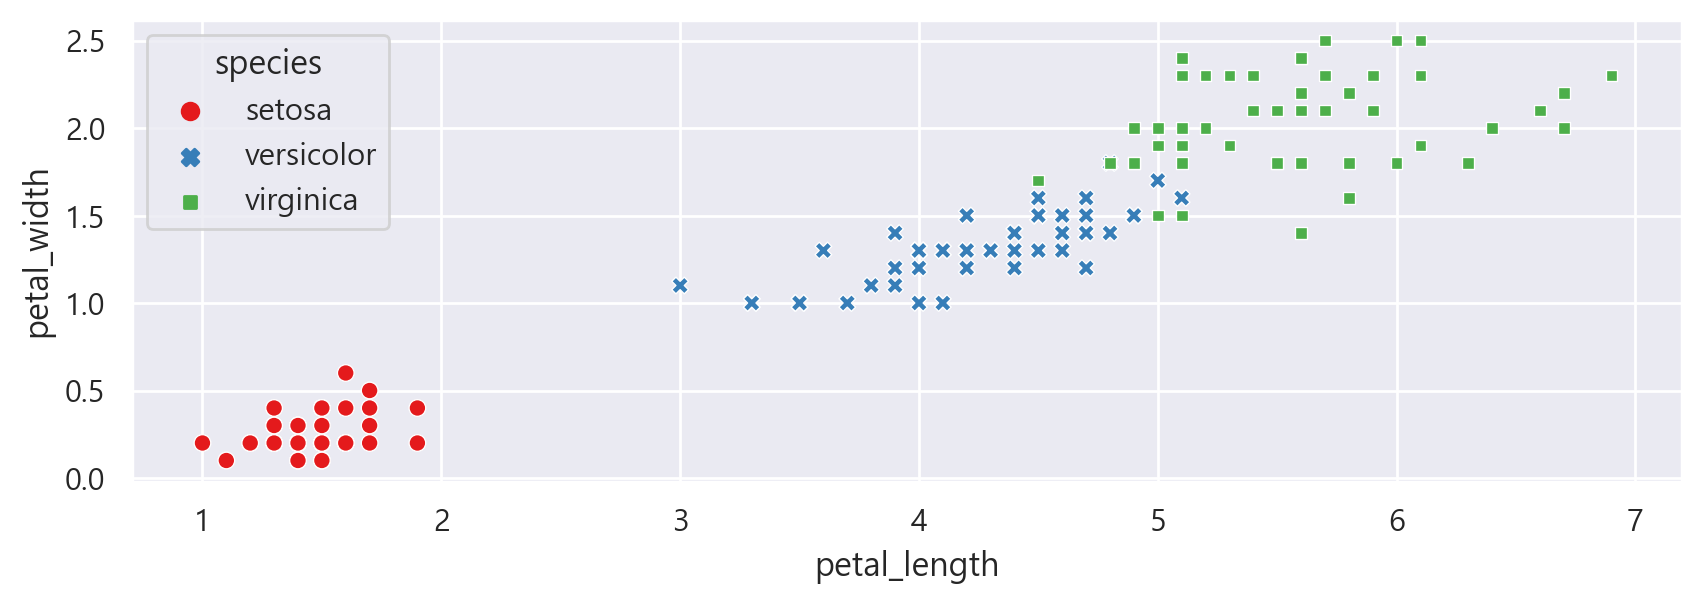

In [30]:
# 종별 다른 색상과 다른 스타일로 scatter
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               style='species', palette='Set1')
plt.show()

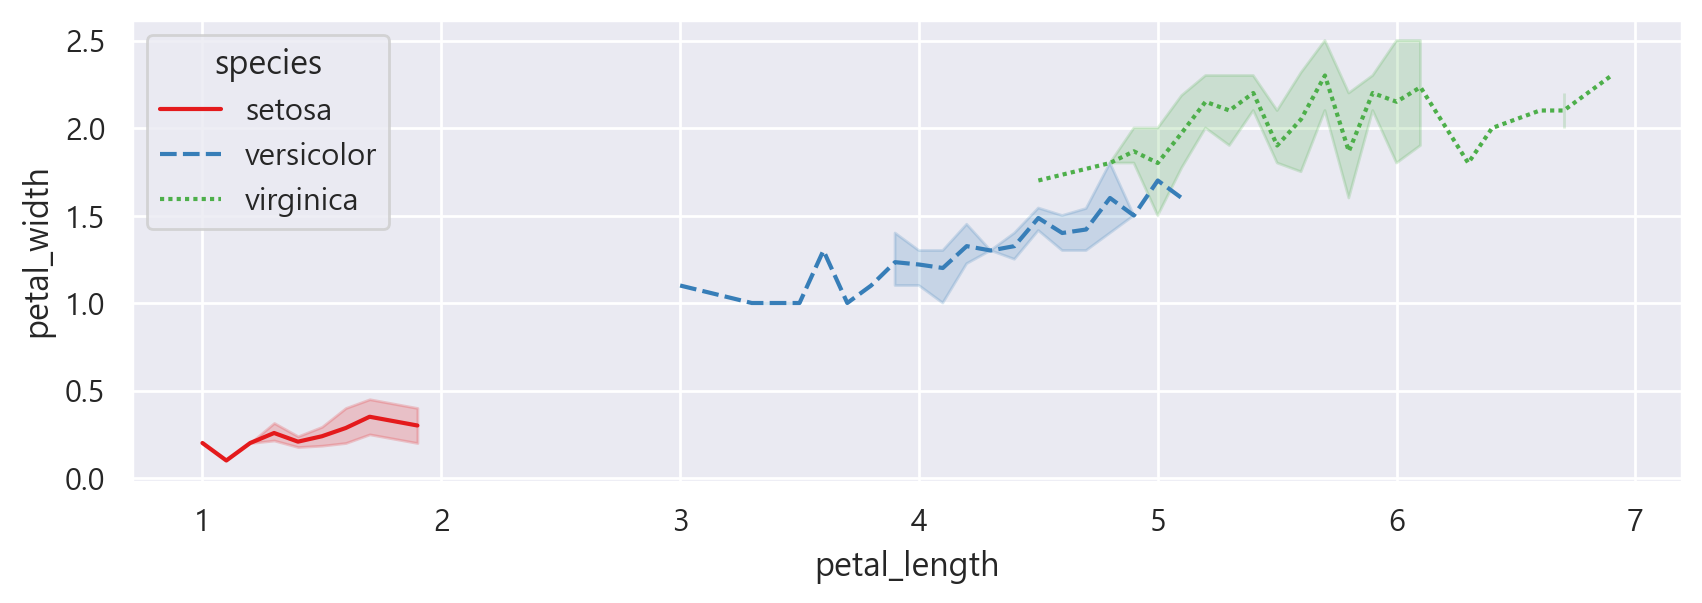

In [31]:
# 종별 다른 색상과 다른 스타일로 lineplot
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species',
               style='species', palette='Set1')
plt.show()

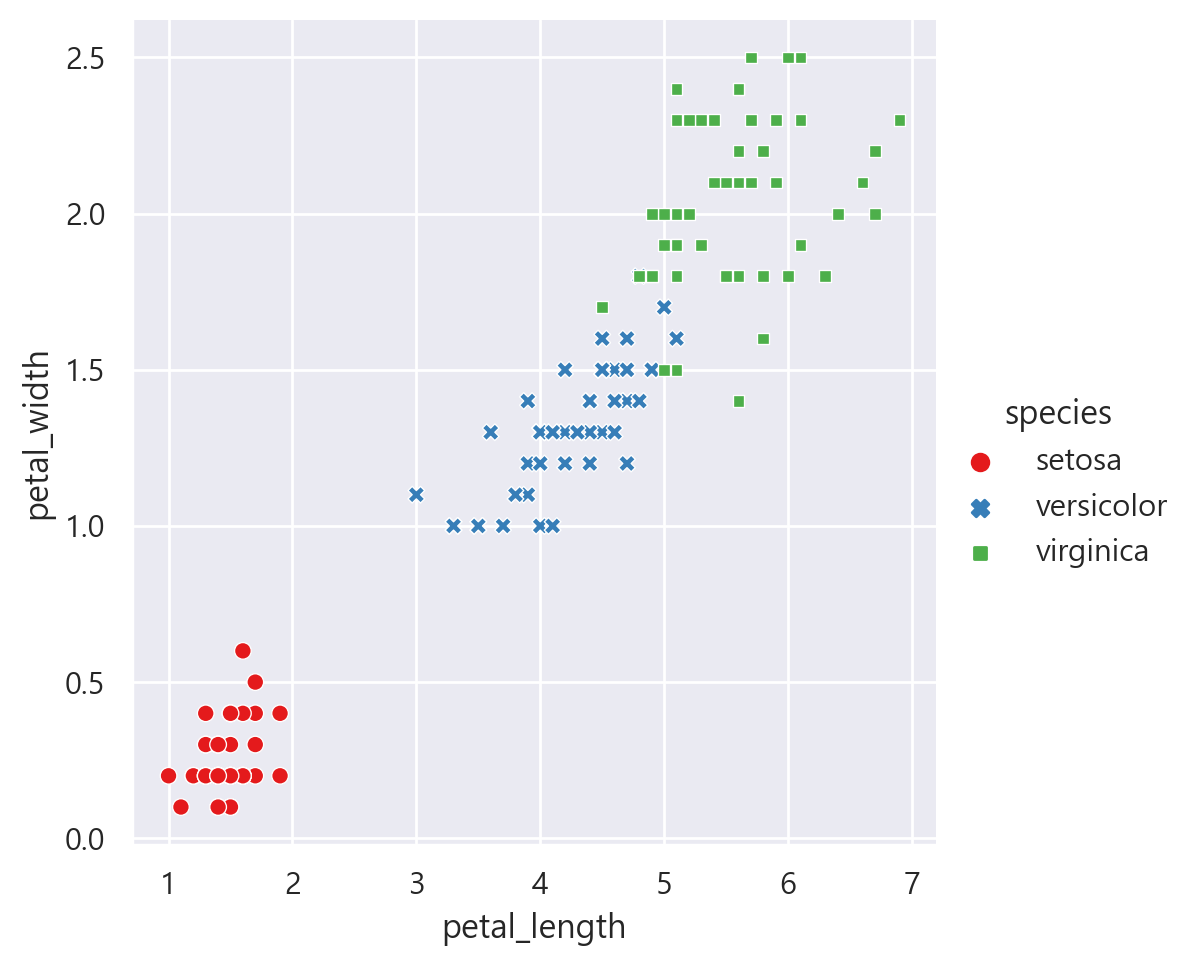

In [37]:
# 종별 다른 색상과 다른 스타일로 relplot
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
               style='species', palette='Set1')
plt.show()

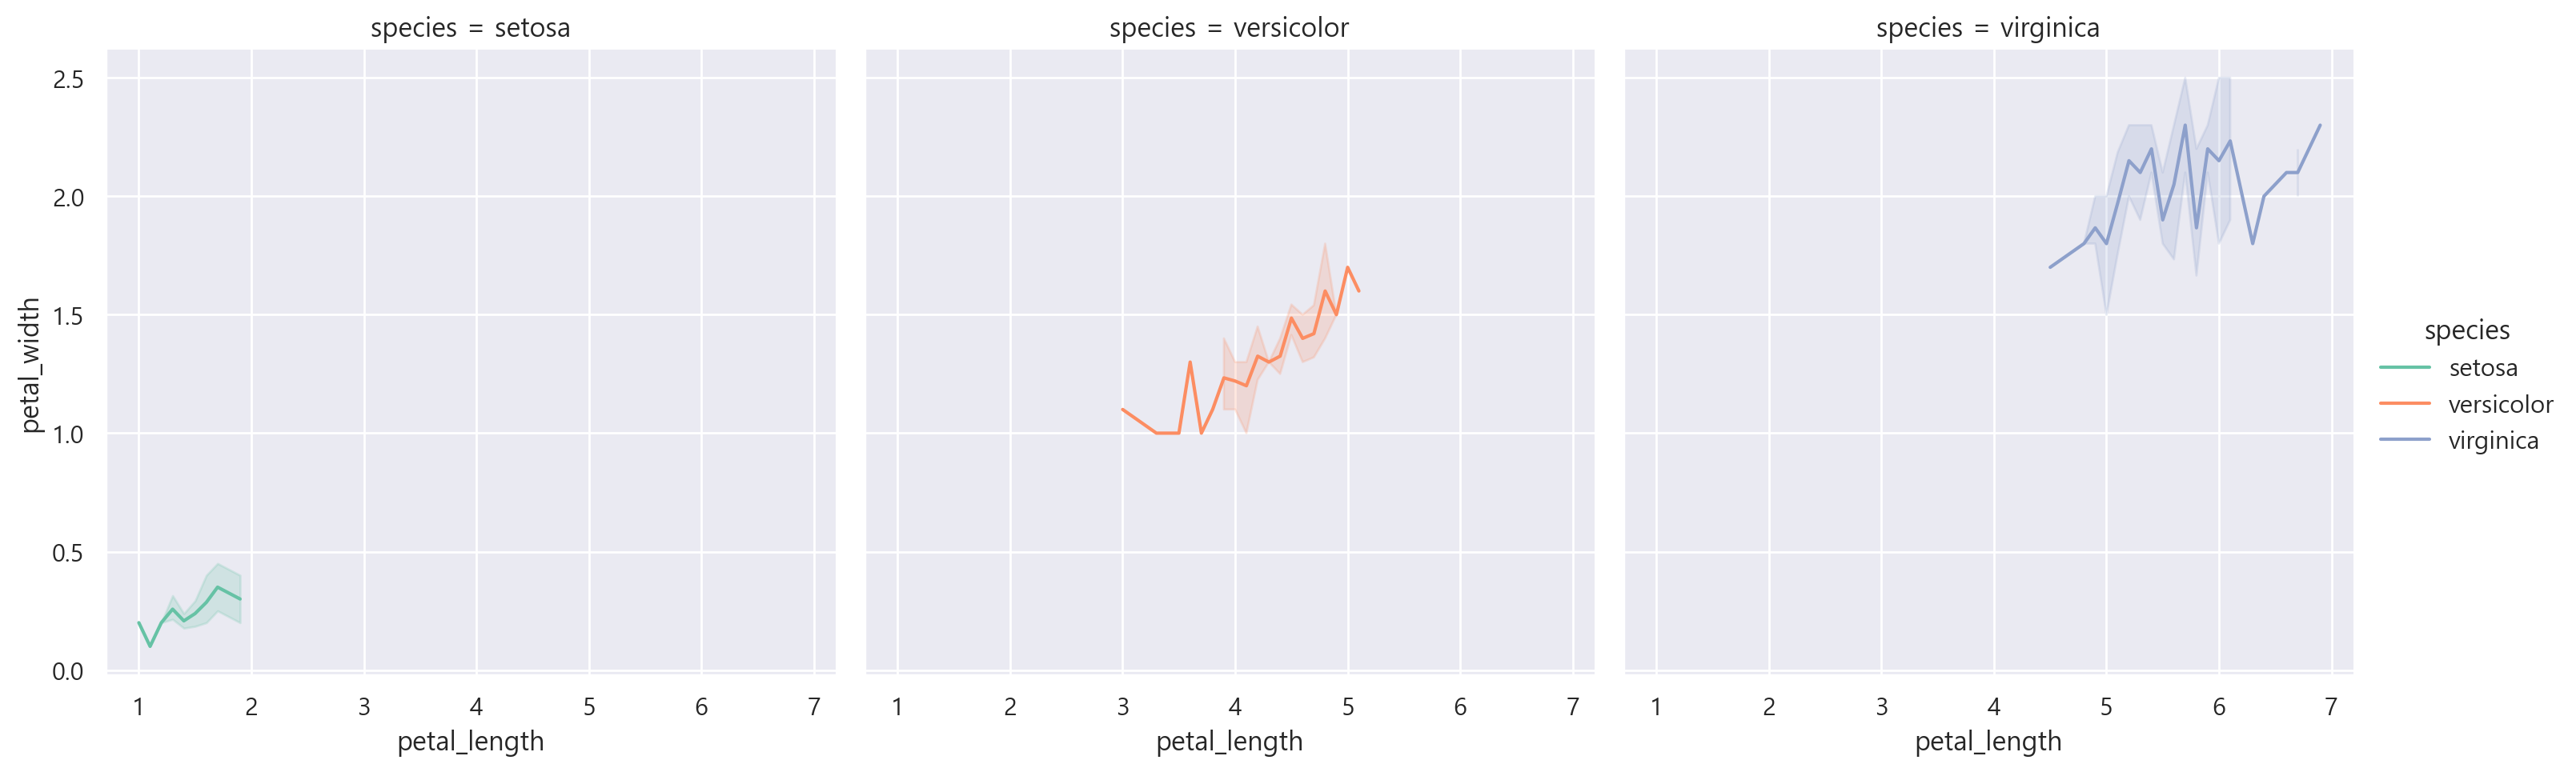

In [35]:
# 종별 lineplot을 subplot으로
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
            kind='line', # subplot으로 그려질 그래프 종류(기본값:scatter)
            col='species', # col단위로 subplot 표현
            #col_wrap=2, # 한 줄에 표현될 subplot의 수
            #facet_kws={'sharey':False} # 축 공유 여부
           )
plt.show()

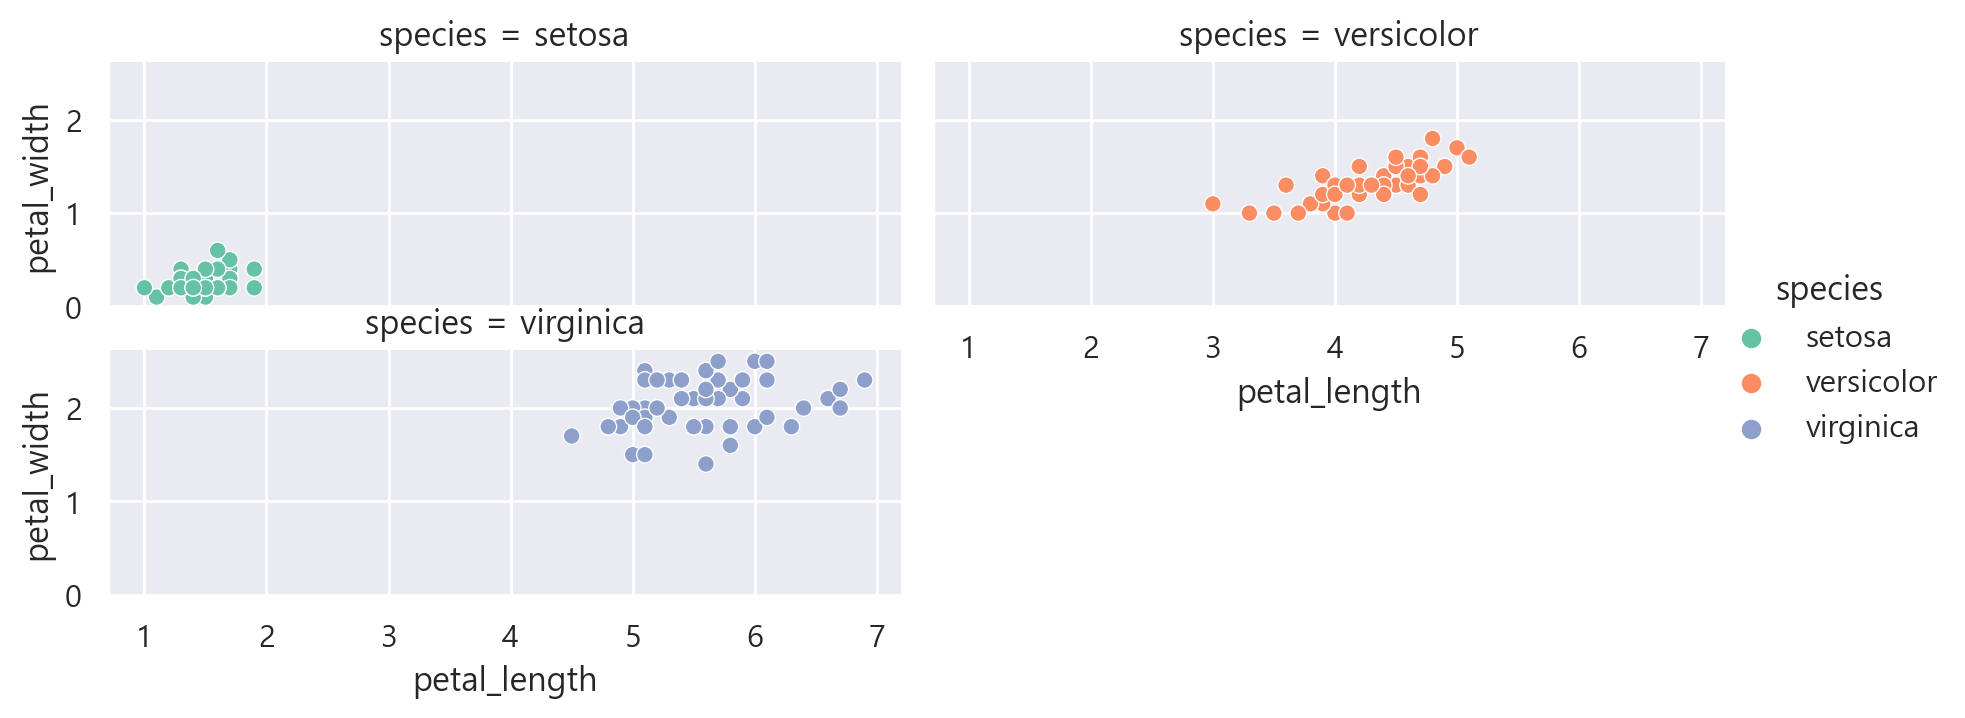

In [36]:
# 종별 scatterplot을 subplot으로
g = sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species',
            kind='scatter', # subplot으로 그려질 그래프 종류(기본값:scatter)
            col='species', # col단위로 subplot 표현
            col_wrap=2,
            #facet_kws={'sharey':False} # 축 공유 여부
           )
# 크기 조정
g.fig.set_size_inches(10,3)
plt.show()

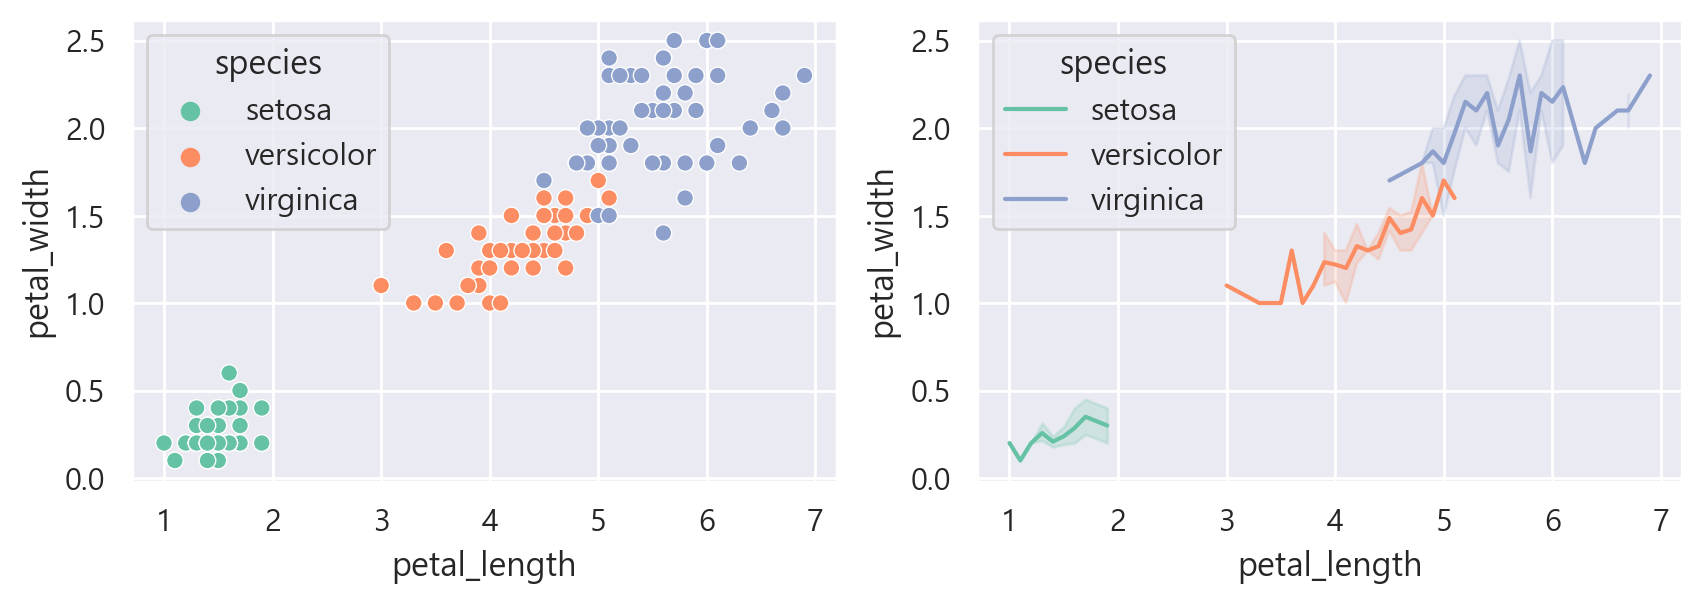

In [42]:
#ax[0]에는 scatter, ax[1]에는 line
fig, ax = plt.subplots(ncols=2)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[0])
sns.lineplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax[1])
plt.show()

### 2) 범주형 그래프
- stripplot(무작위로 흩뿌림), swarmplot(겹치치 않음) : 점 도표(산점도)
- barplot, pointplot(막대 대신 marker가 있는 선) : 막대 도표 
- countplot(bar는 y의 평균값이 높이, count는 x의 빈도 수 높이)
- boxplot, violinplot, boxenplot => catplot(subplot)

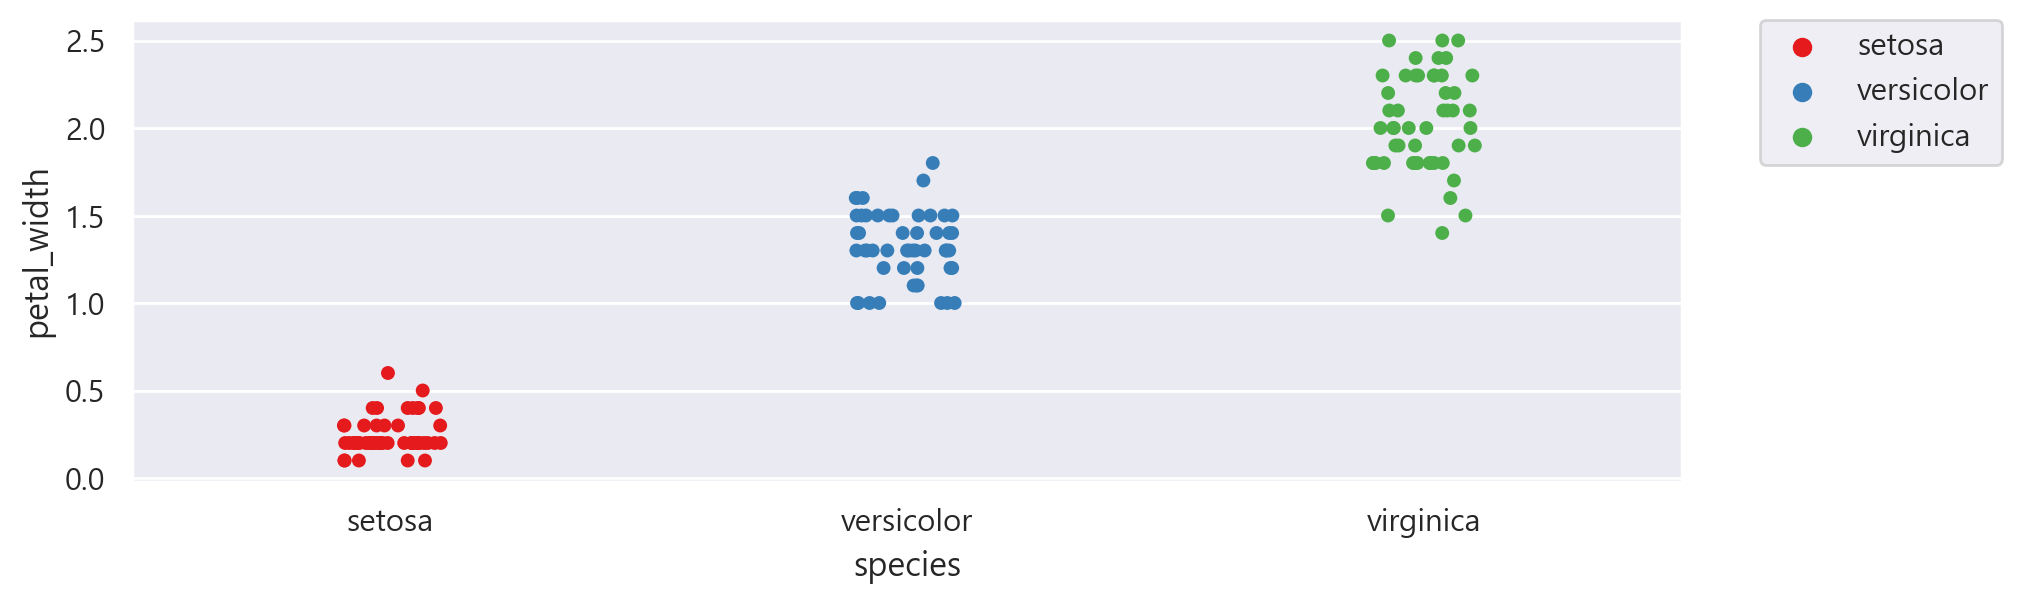

In [47]:
# x축이 범주형일 때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue='species', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

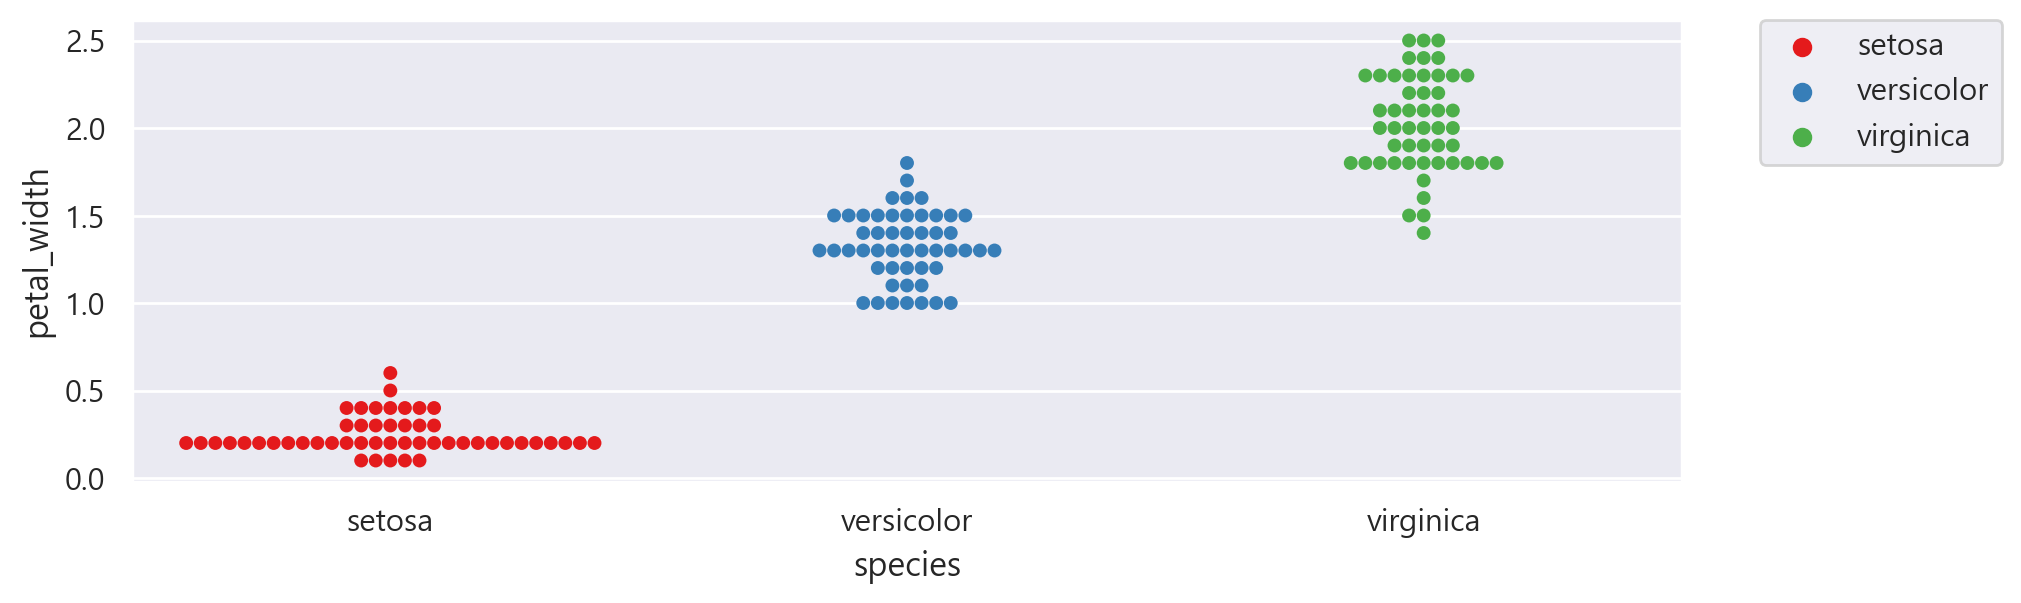

In [48]:
# x축이 범주형일 때의 산점도(중첩되지 않게)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

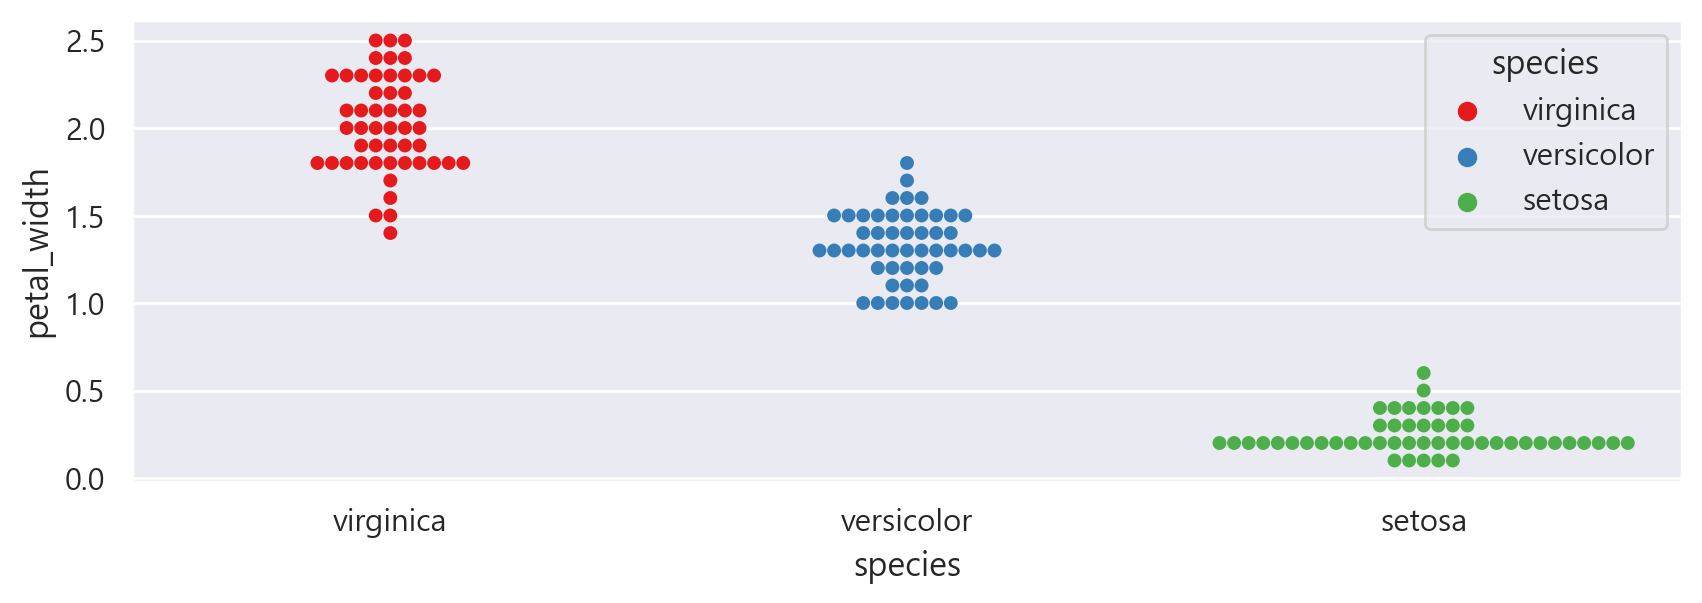

In [49]:
# 값을 기준으로 내림차순으로 정렬된 iris 범주형 산점도
sns.swarmplot(data=iris.sort_values('petal_width', ascending=False),
             x='species', y='petal_width', hue='species', palette='Set1')
plt.show()

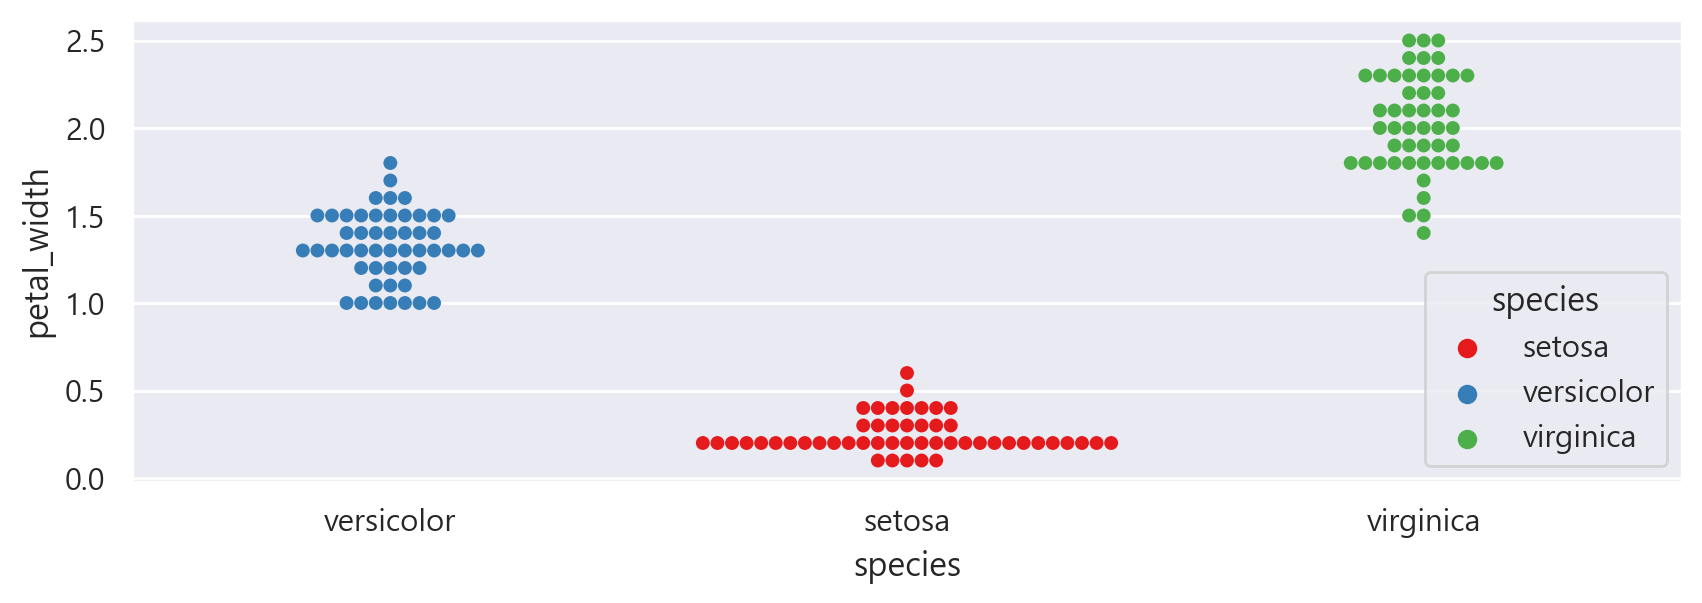

In [50]:
# x축의 순서를 임의로 지정 
sns.swarmplot(data=iris,
             x='species', y='petal_width', hue='species', palette='Set1',
             order=['versicolor', 'setosa', 'virginica'])
plt.show()

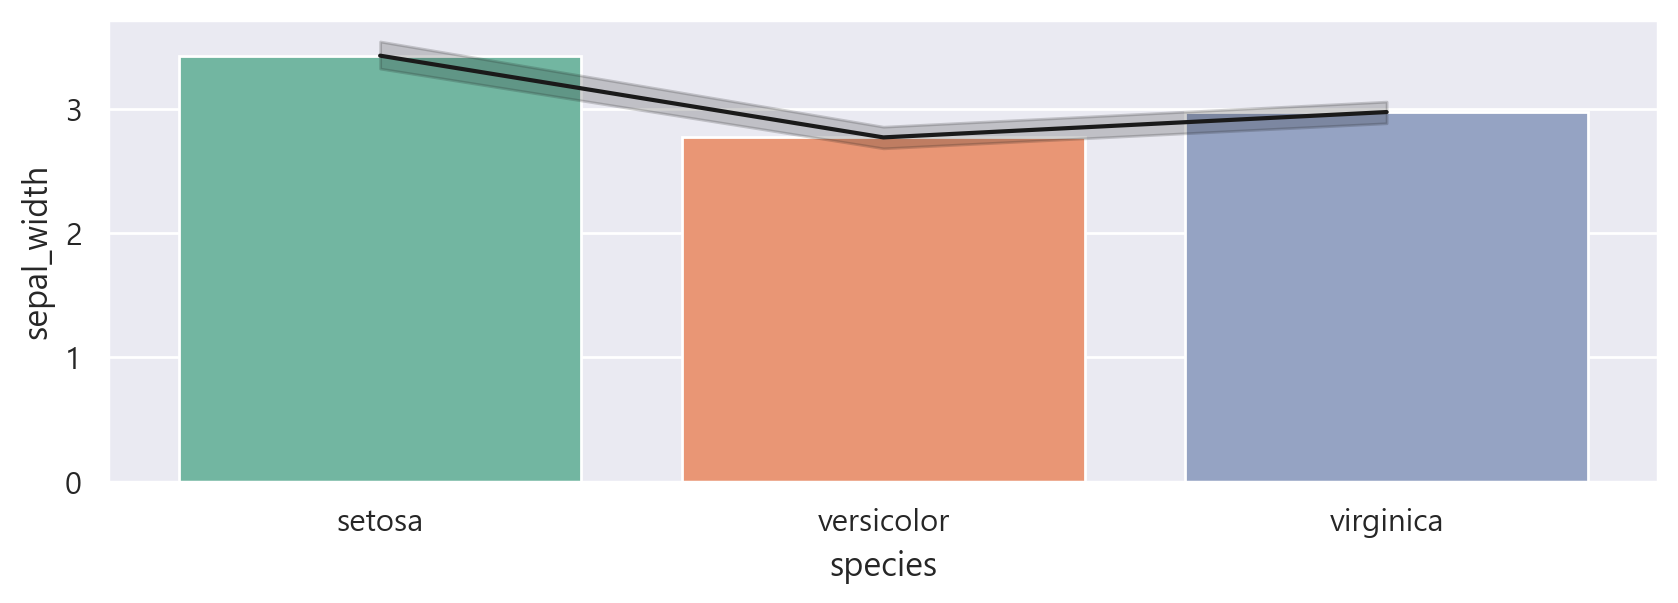

In [54]:
# barplot : 각 범주별 평균값과 그에 대한 신뢰구간을 나타냄
# 신뢰구간 제외 : errorbar=None
sns.barplot(data=iris, x='species', y='sepal_width',
           errorbar=None)
sns.lineplot(data=iris, x='species', y='sepal_width', color='k')
plt.show()

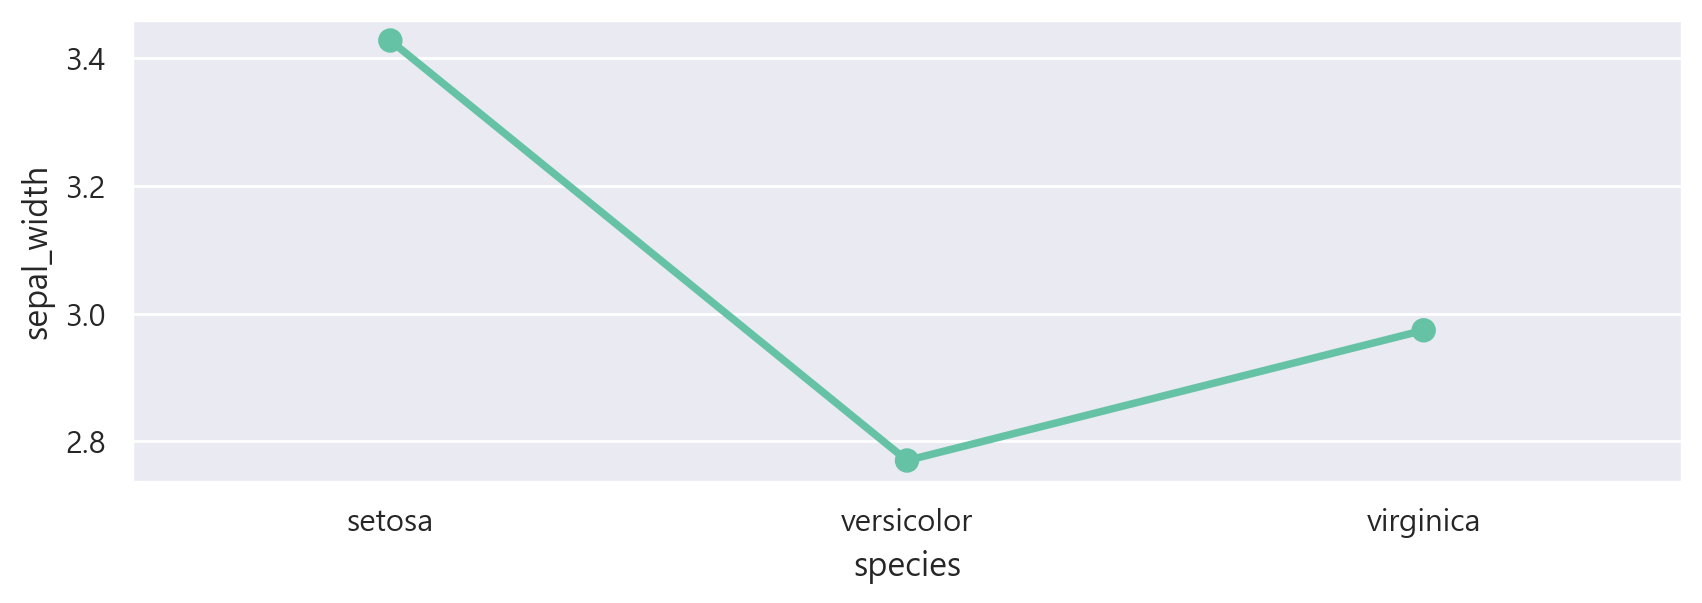

In [57]:
# pointplot
sns.pointplot(data=iris, x='species', y='sepal_width', errorbar=None)
plt.show()

In [58]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


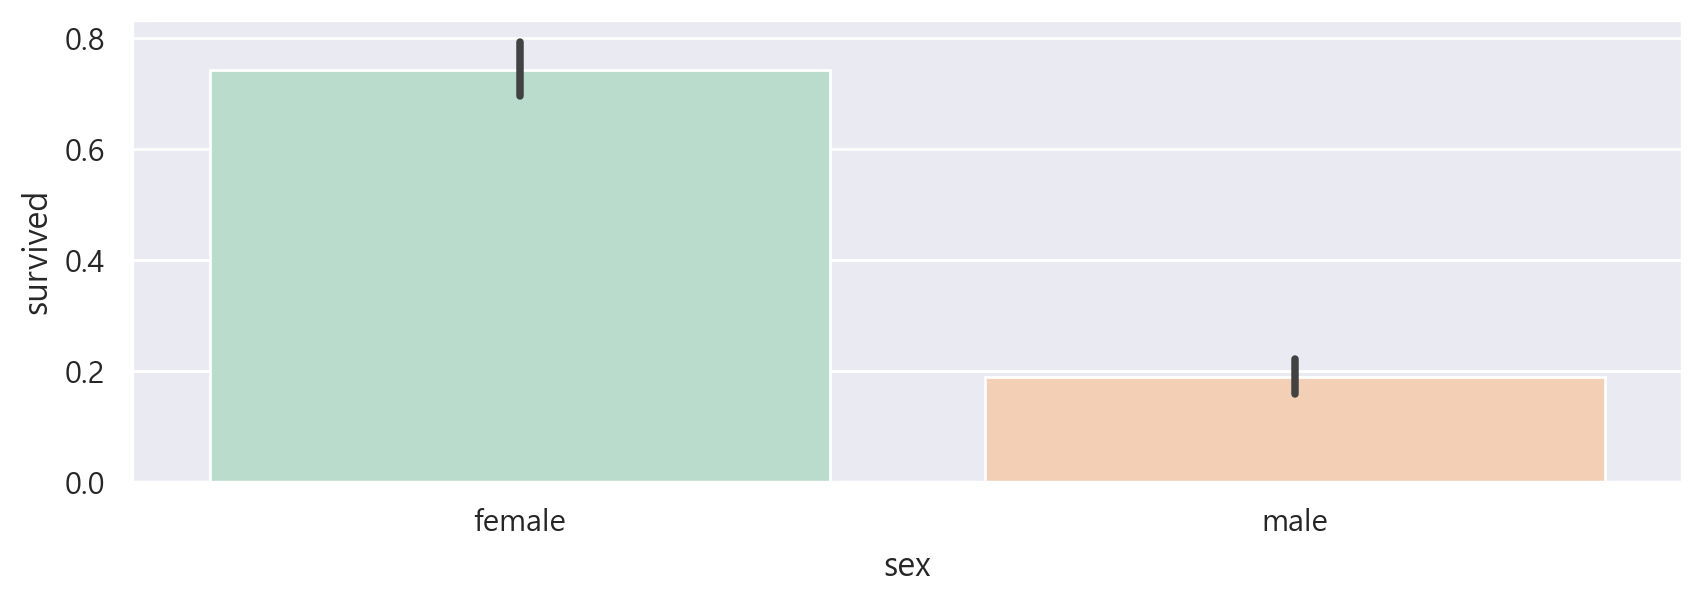

In [61]:
# 성별 평균 생존율을 막대 그래프로
sns.barplot(data=titanic, x='sex', y='survived',
           order=['female', 'male'],
           palette='Pastel2')
plt.show()

In [62]:
# 남녀 데이터 수 
titanic.groupby('sex')['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [63]:
# 남녀 데이터 수 (정렬)
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

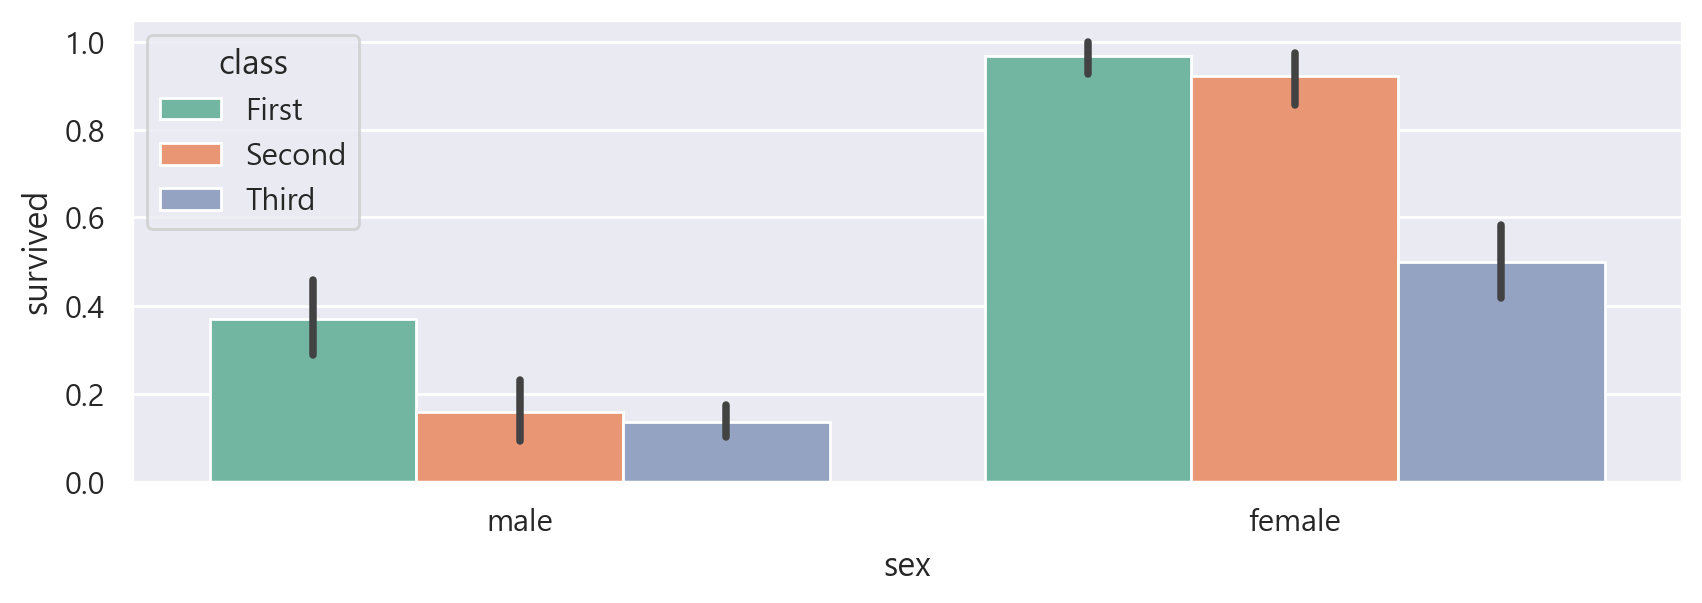

In [66]:
# class별 생존률
sns.barplot(data=titanic, x='sex', y='survived', hue='class')

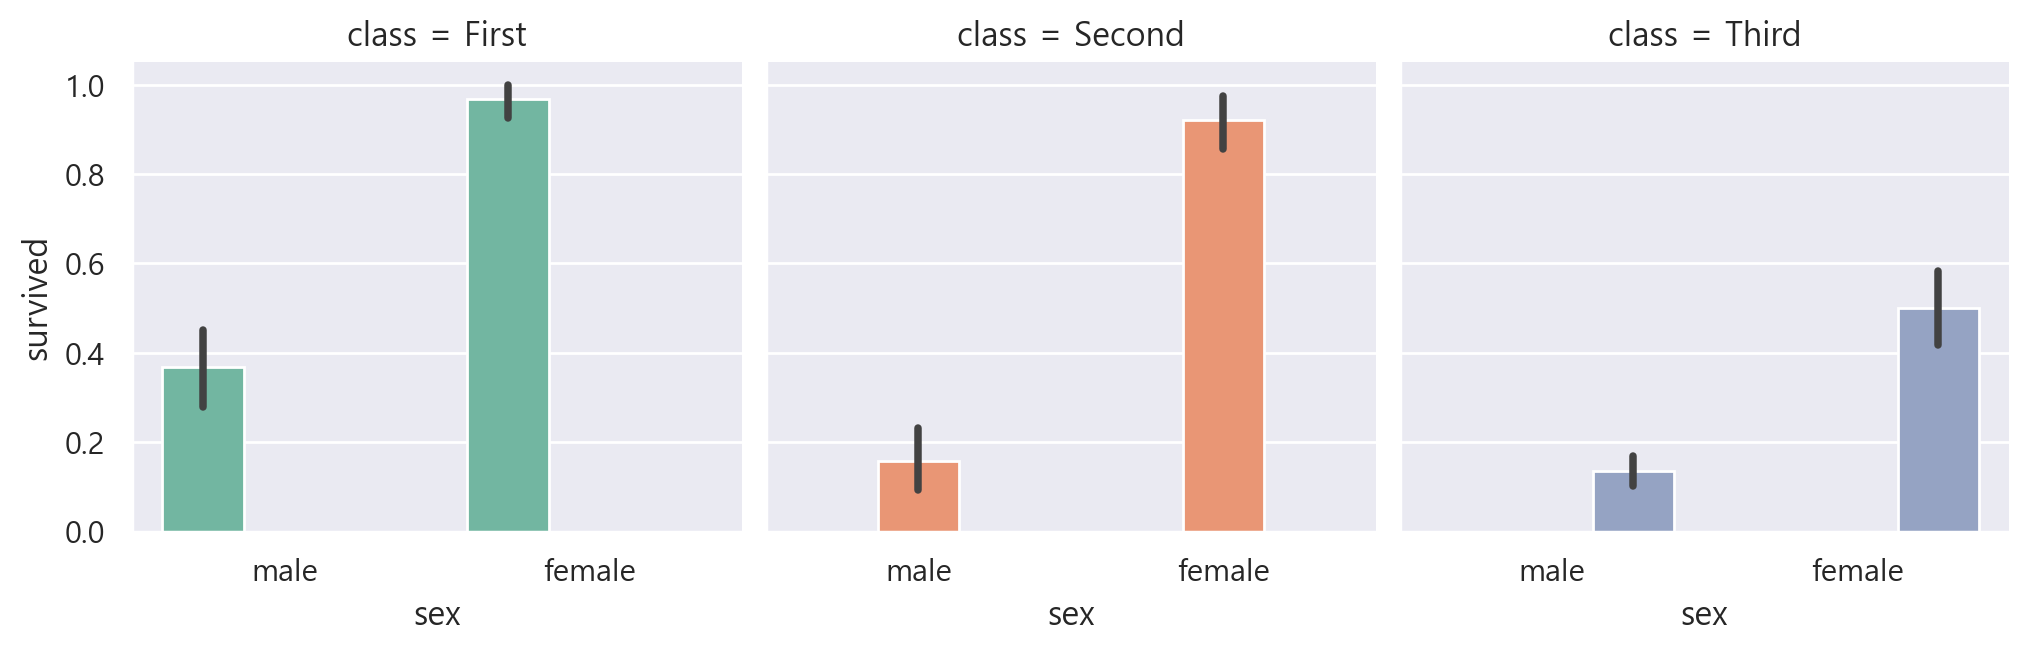

In [70]:
# class별 성별 생존률을 subplot으로
g = sns.catplot(data=titanic,
               x='sex', y='survived',
               hue='class', kind='bar',
               col='class')
g.fig.set_size_inches(10,3)

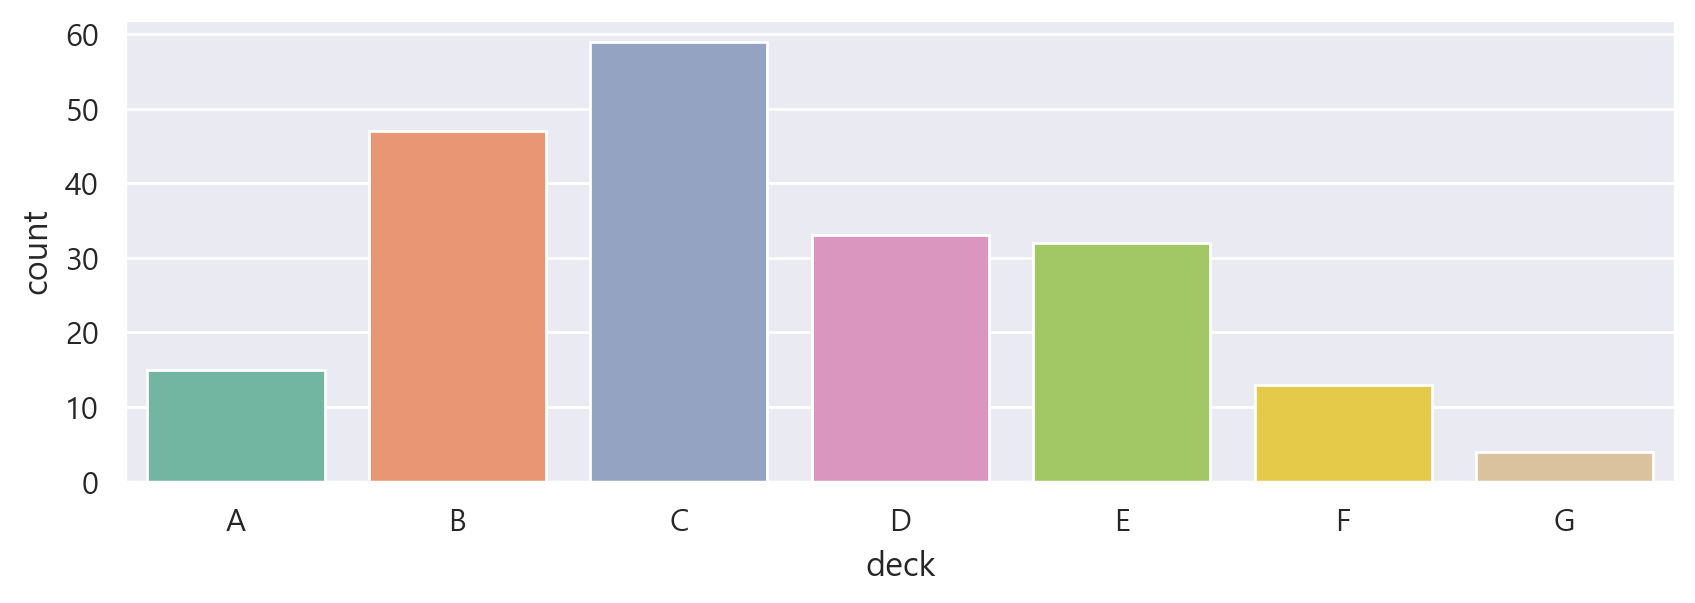

In [71]:
# deck별 데이터 수를 막대 그래프로 (countplot)
sns.countplot(data=titanic, x='deck')
plt.show()

In [72]:
# deck별 개수
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

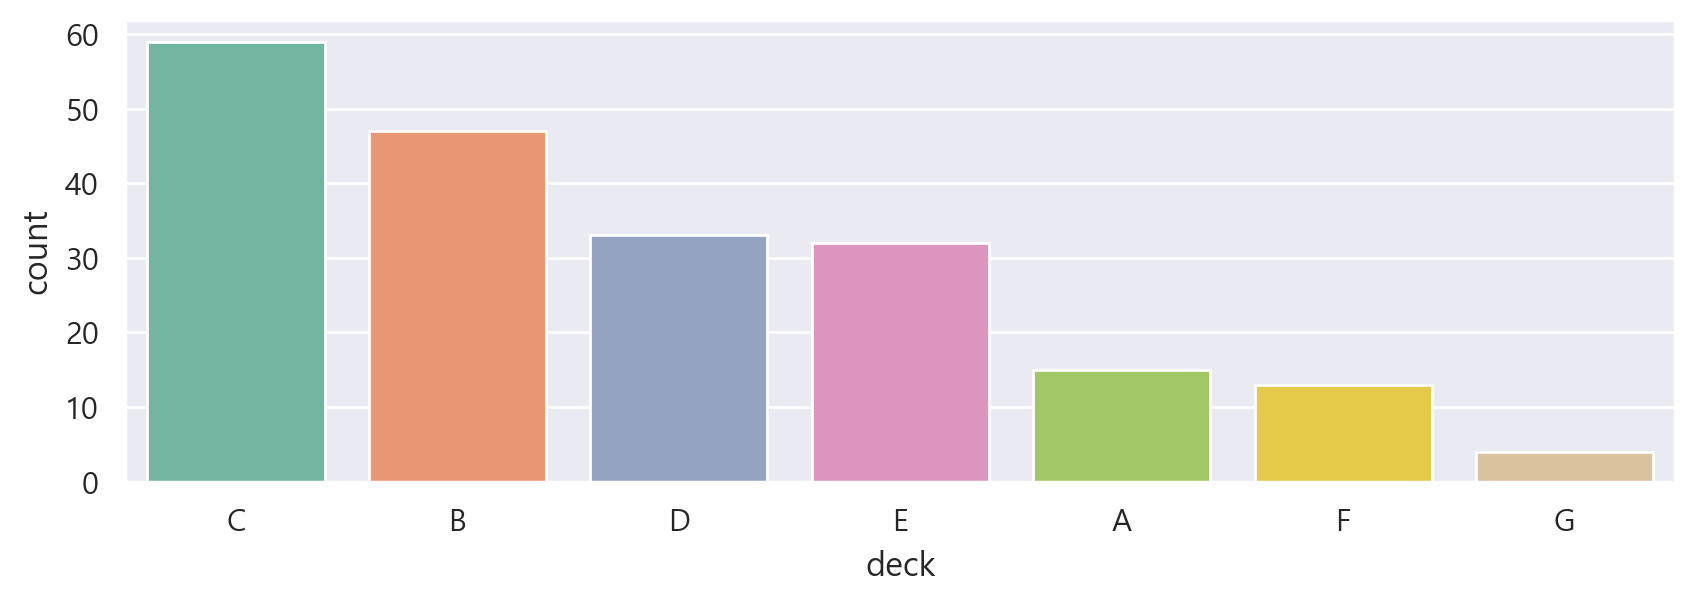

In [73]:
# deck별 데이터 수를 막대 그래프로 (countplot)
sns.countplot(data=titanic, x='deck', order=titanic['deck'].value_counts().index)
plt.show()

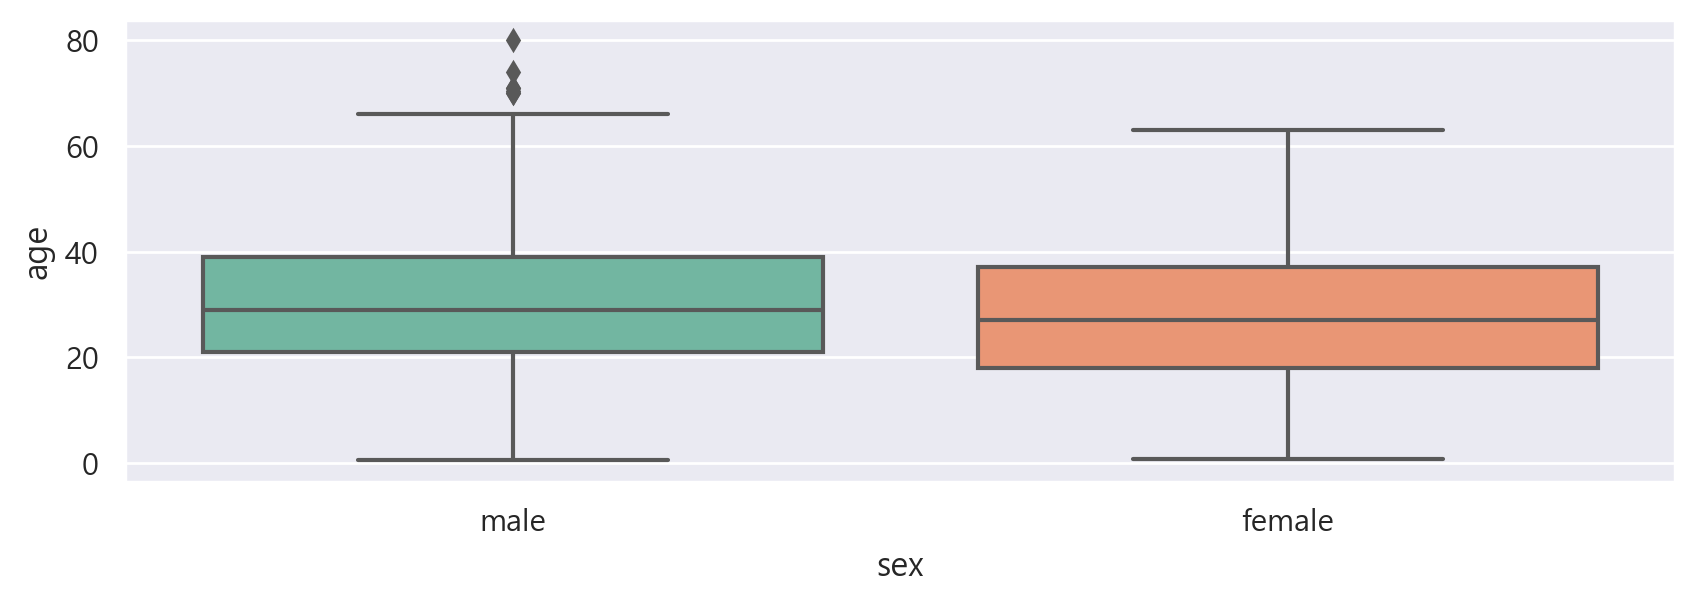

In [76]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age')
plt.show()

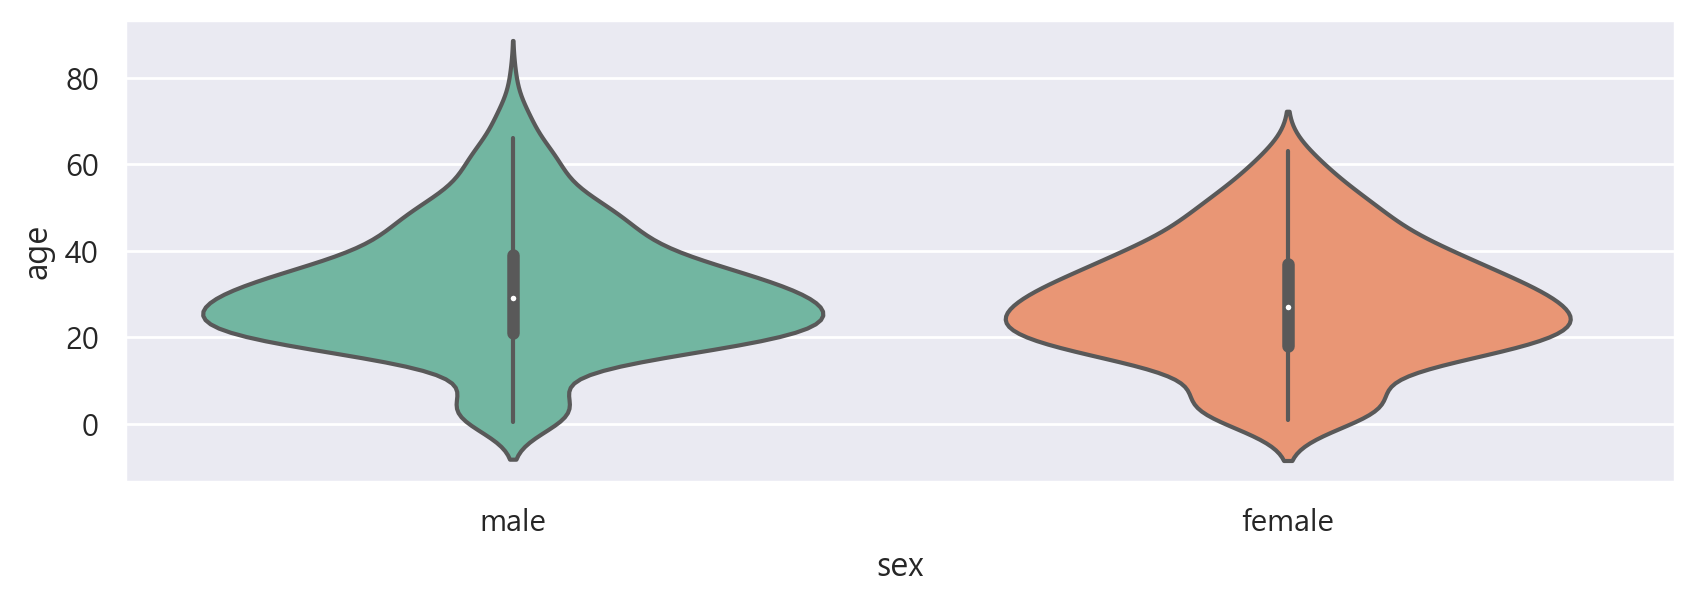

In [77]:
# violinplot
sns.violinplot(data=titanic, x='sex', y='age')
plt.show()

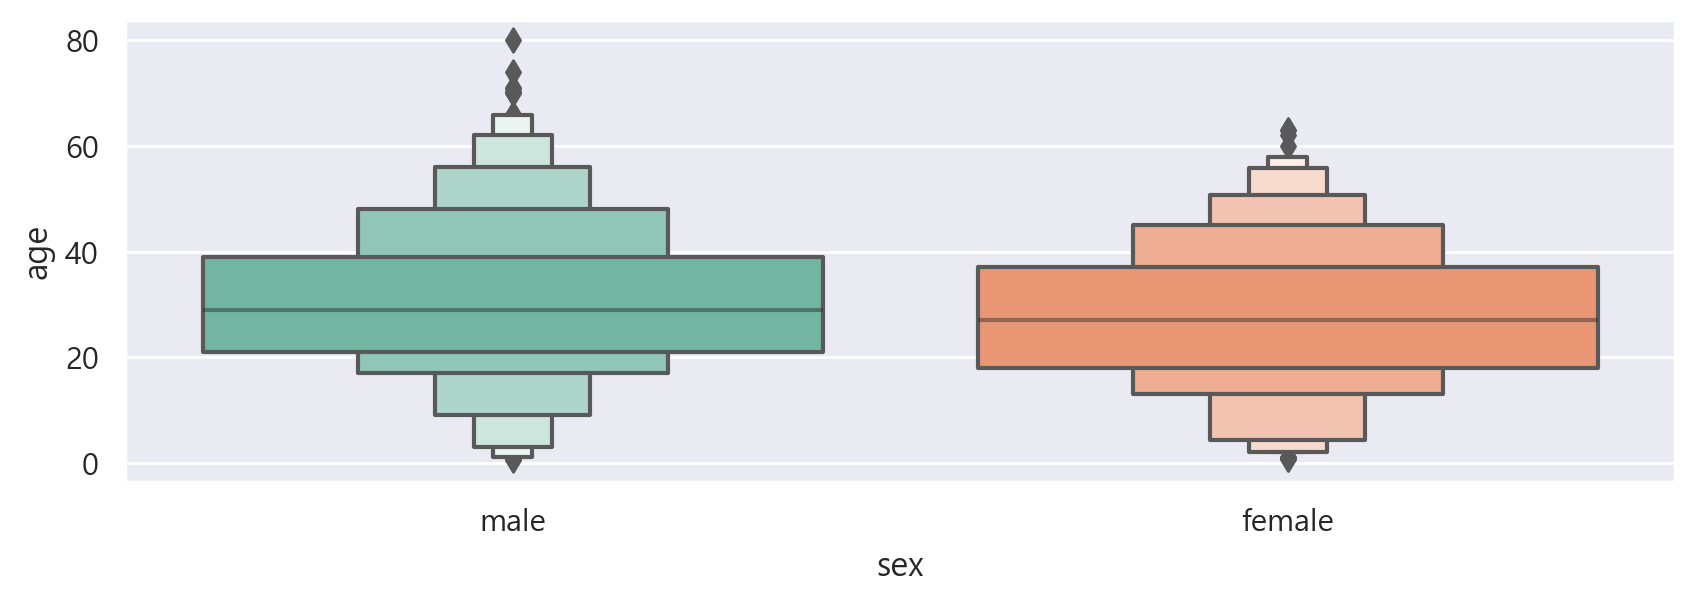

In [78]:
# boxenplot
sns.boxenplot(data=titanic, x='sex', y='age')
plt.show()

### 3) 쌍관계 그래프
- pairplot : 모든 수치형 변수 쌍에 대해 산점도와 히스토그램을 보여줌

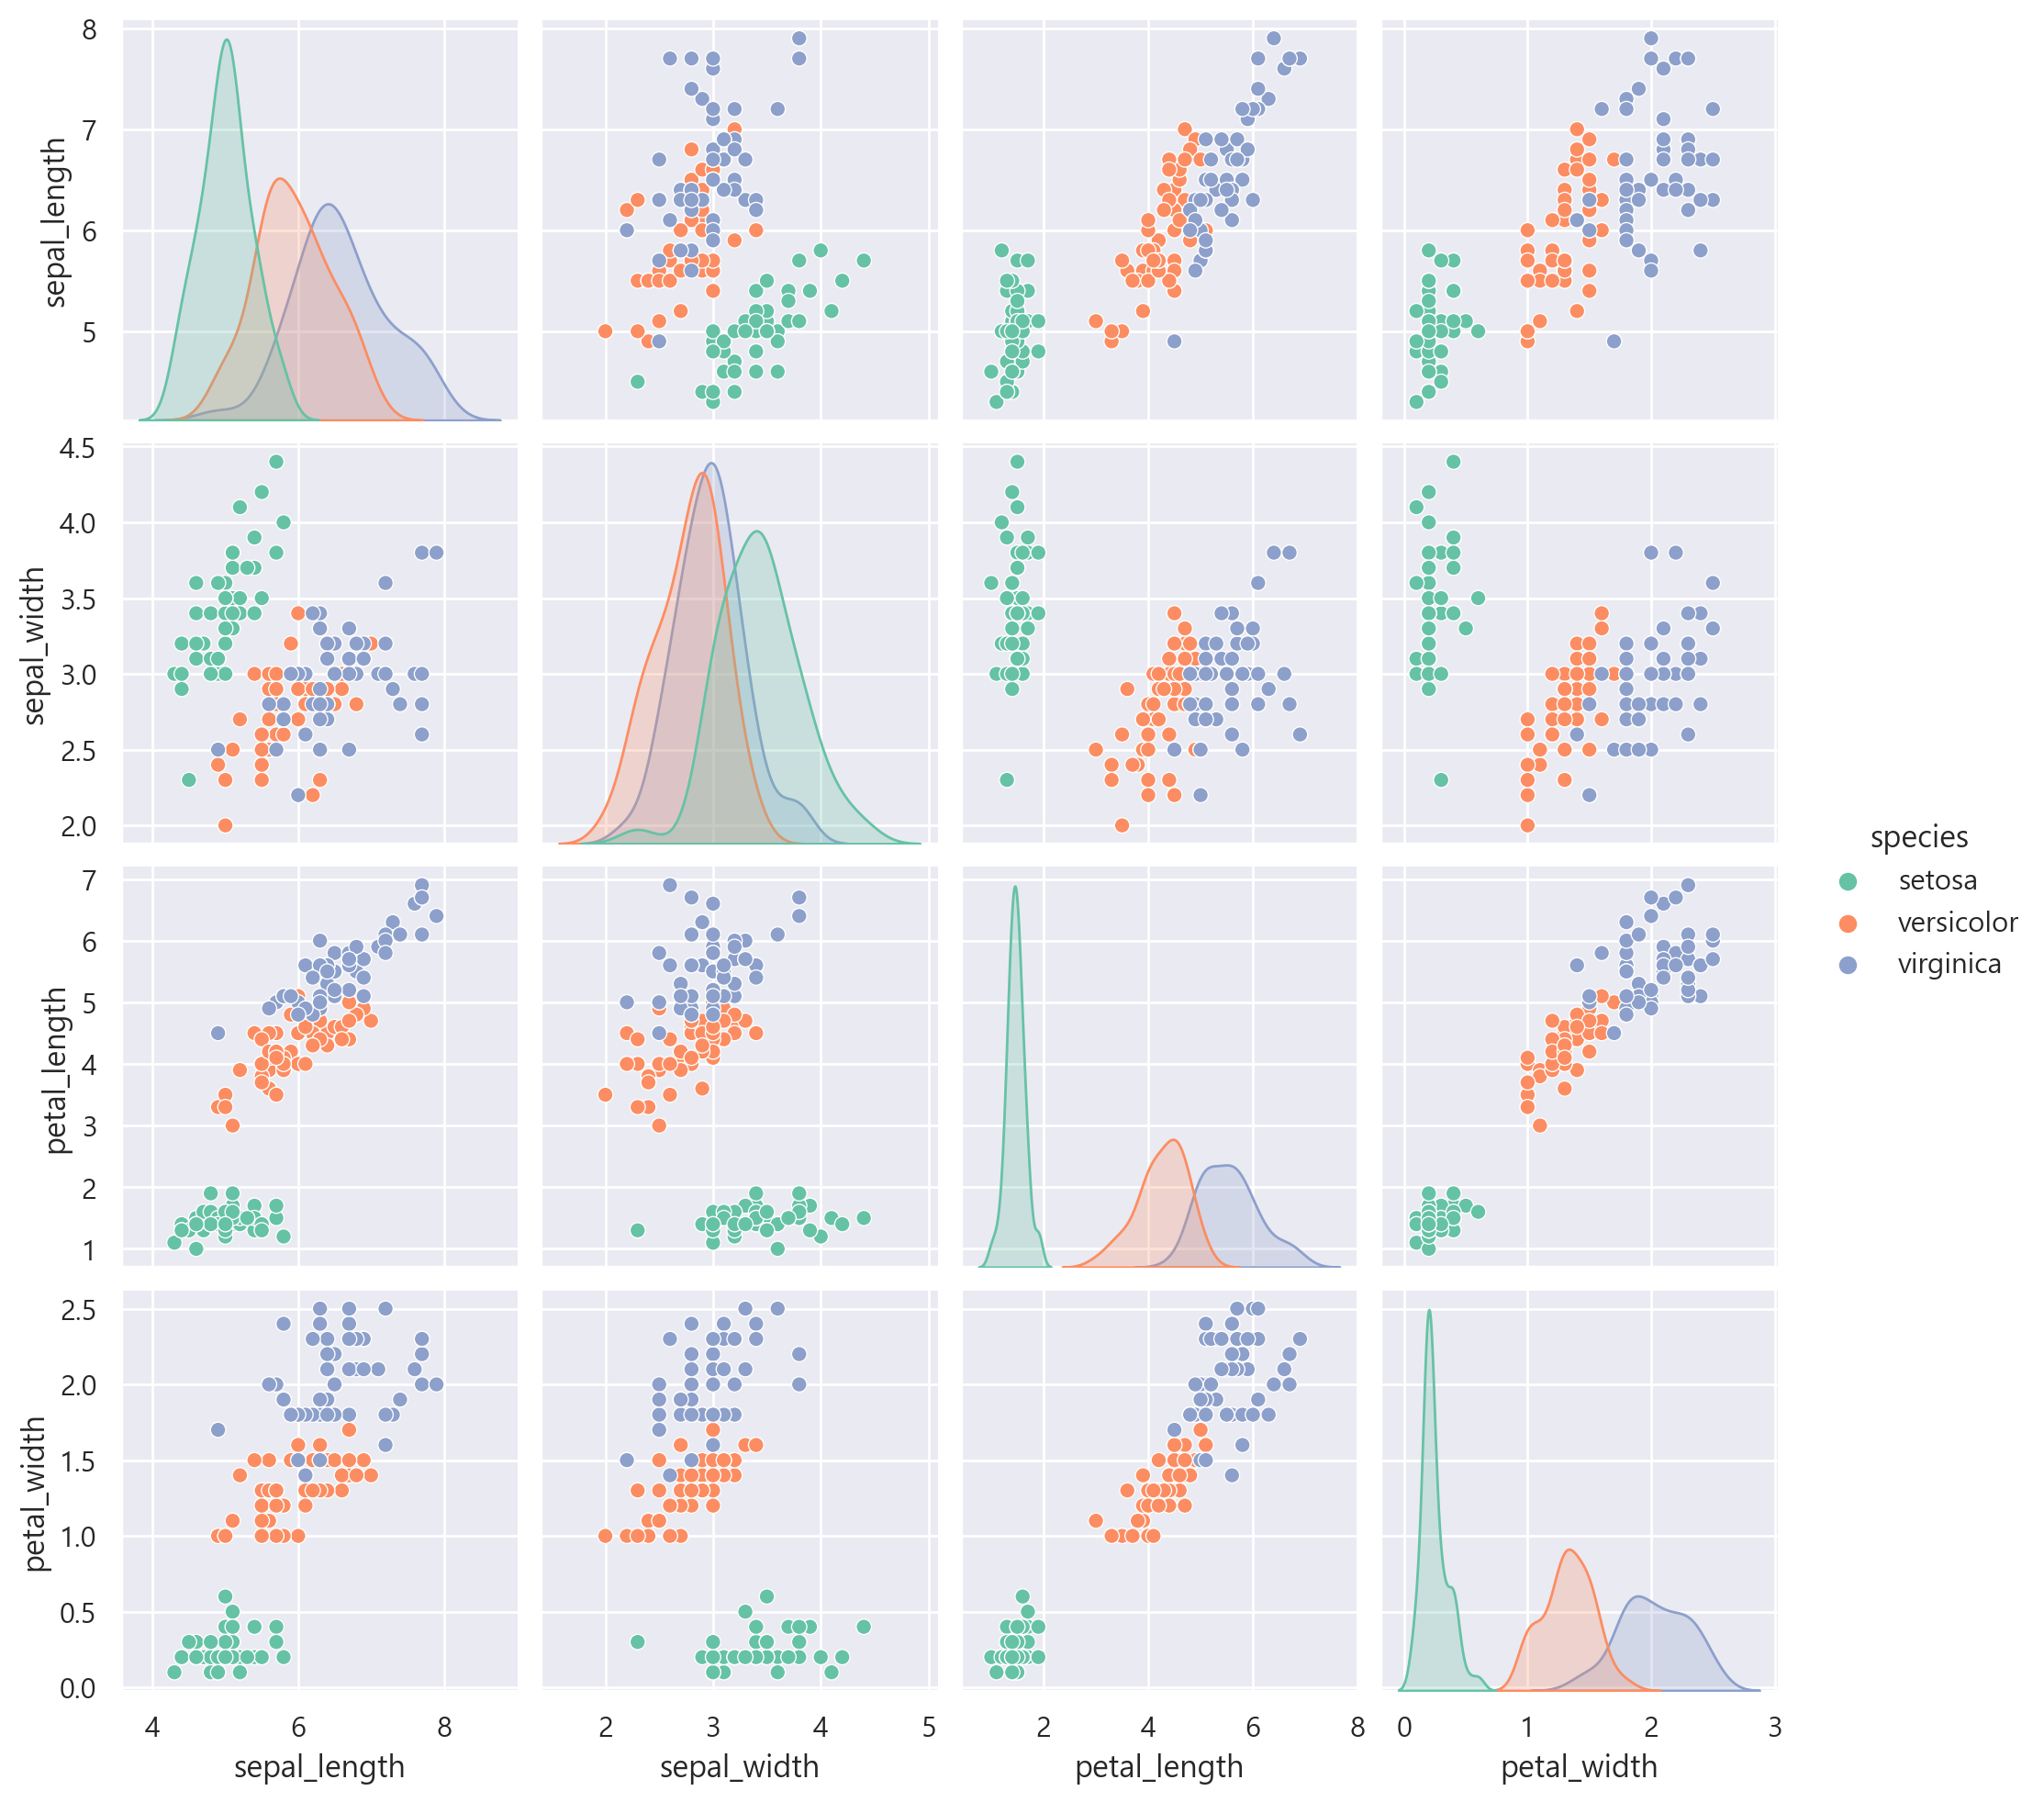

In [79]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도 그래프

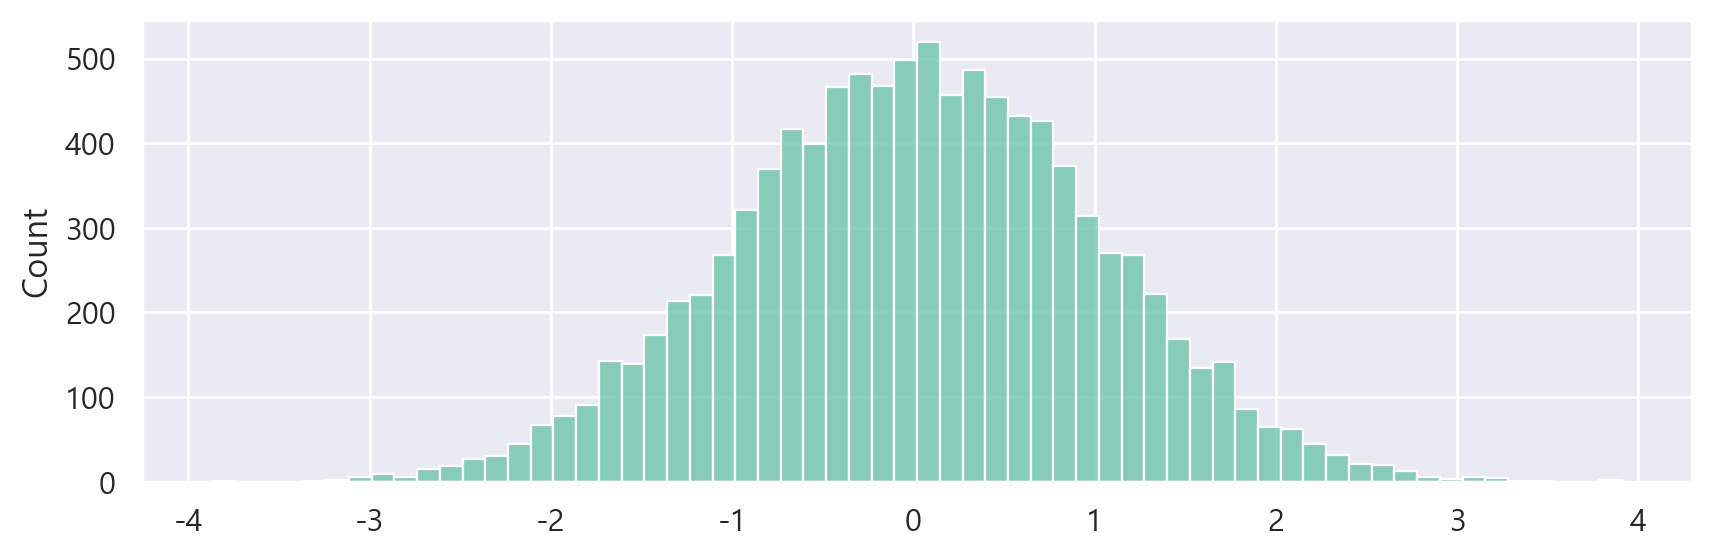

In [80]:
import numpy as np
x = np.random.randn(10000) # 평균 0, 표준편차 1인 정규분포를 이루는 10000개 데이터
sns.histplot(x, kde=False) # Kernel Density Estimation 📊 통계·데이터 분석. 한국어: 커널 밀도 추정. 확률밀도함수를 부드럽게 매끄럽게 추정하는 비모수적 방법.
plt.show()

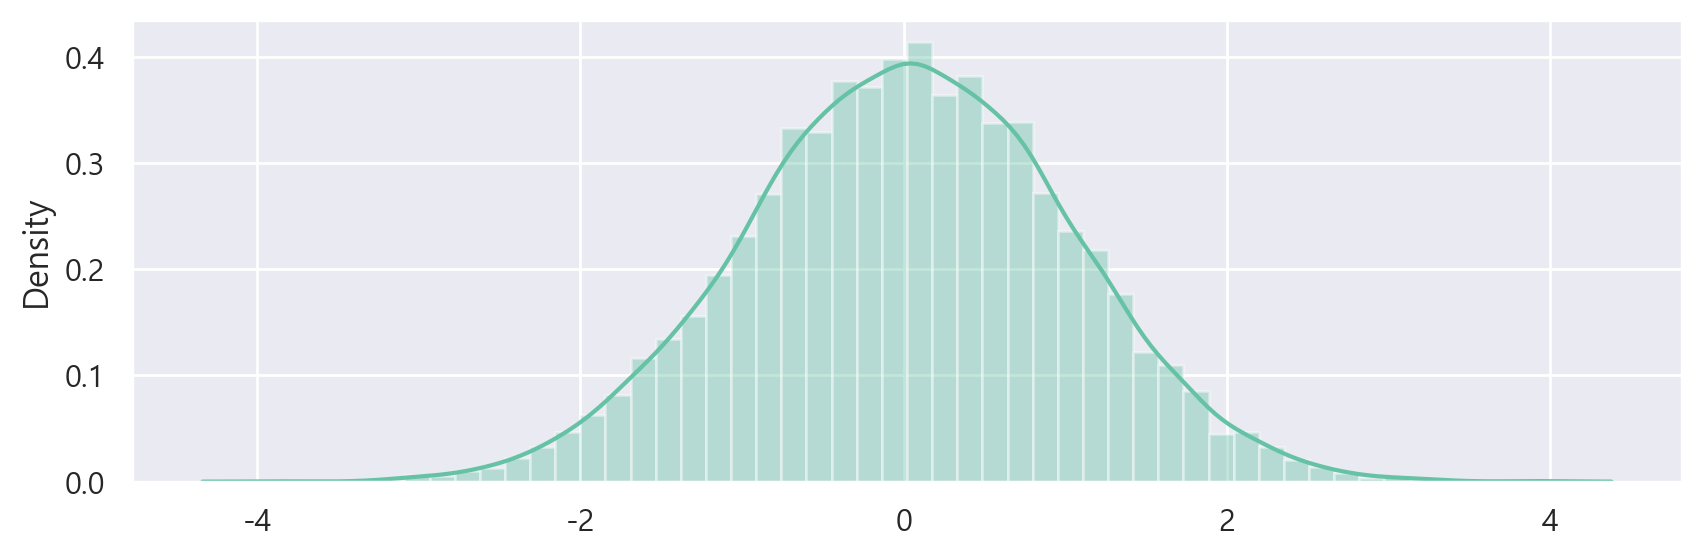

In [81]:
sns.distplot(x)
plt.show()

### 5) 회귀 그래프

In [82]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


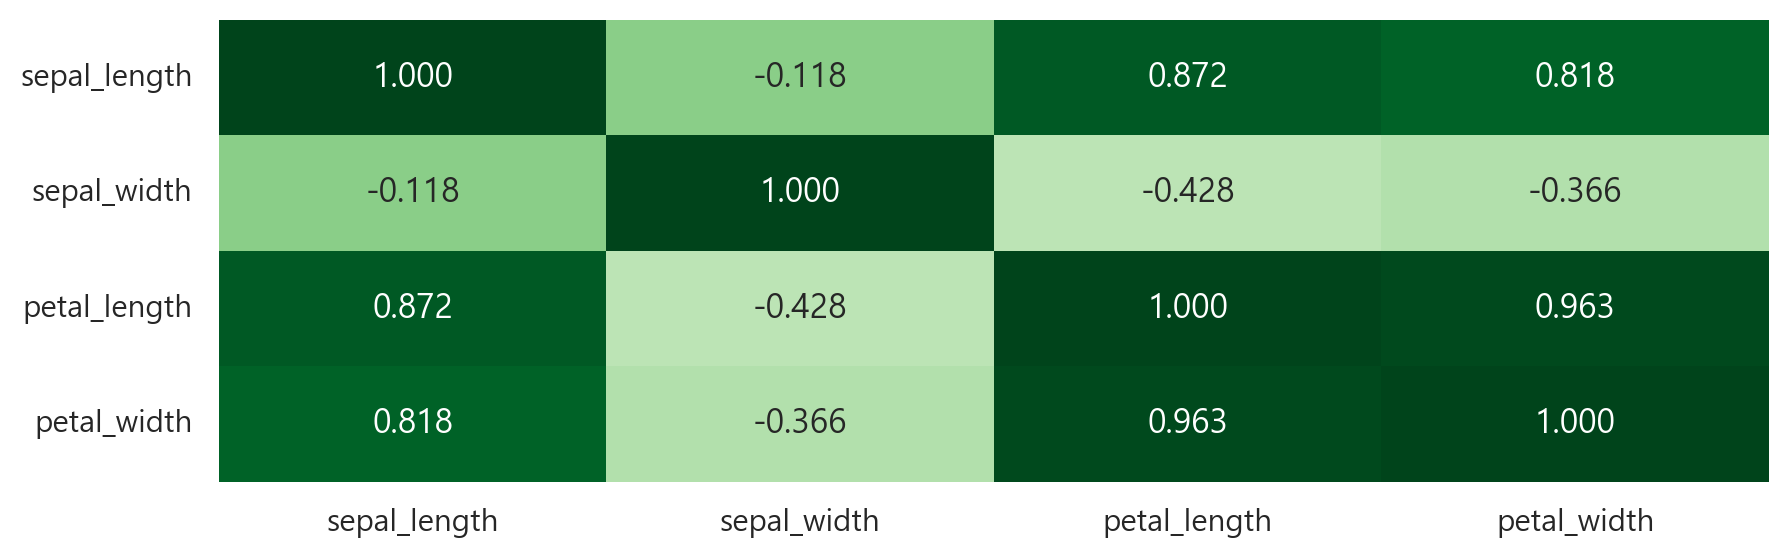

In [85]:
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Greens', cbar=False)
plt.show()

In [88]:
np.ones_like(corr, dtype=bool) # corr과 구조가 같은 1로 채워진 배열

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

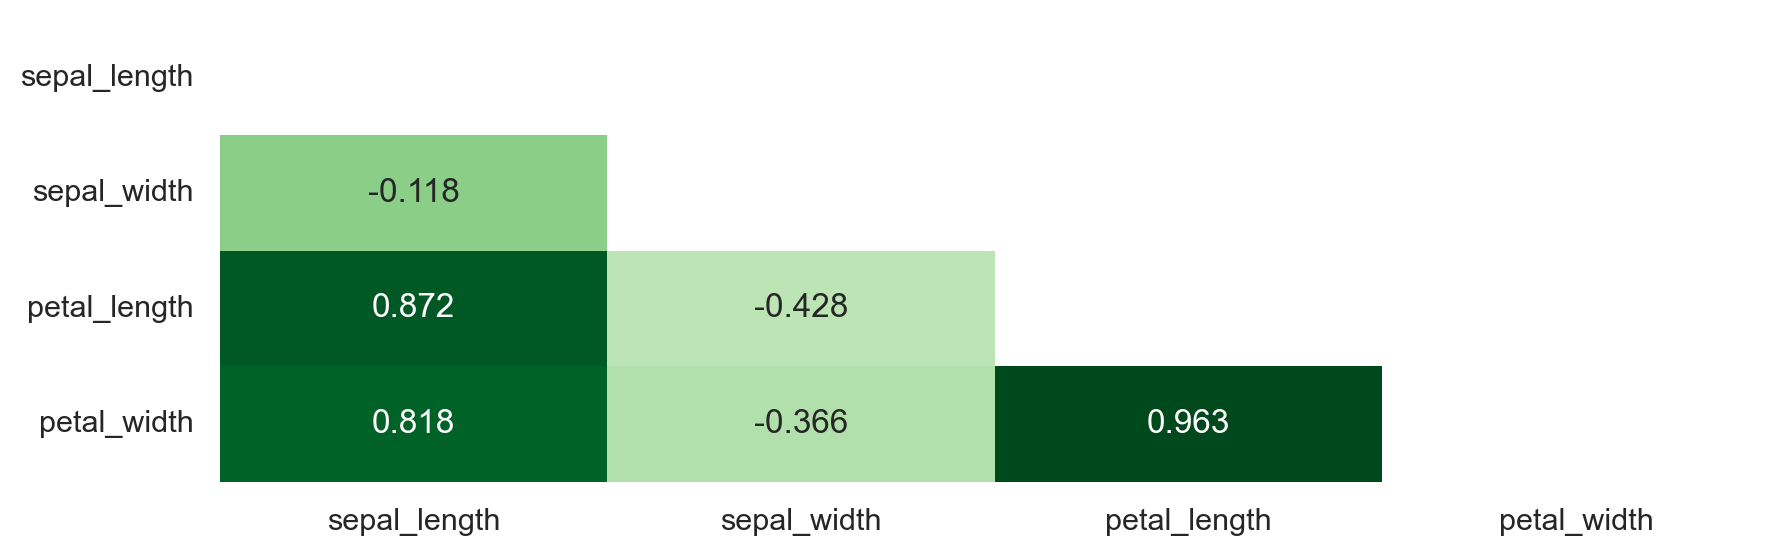

In [93]:
# sns.set(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Greens', cbar=False, mask=mask)
plt.show()

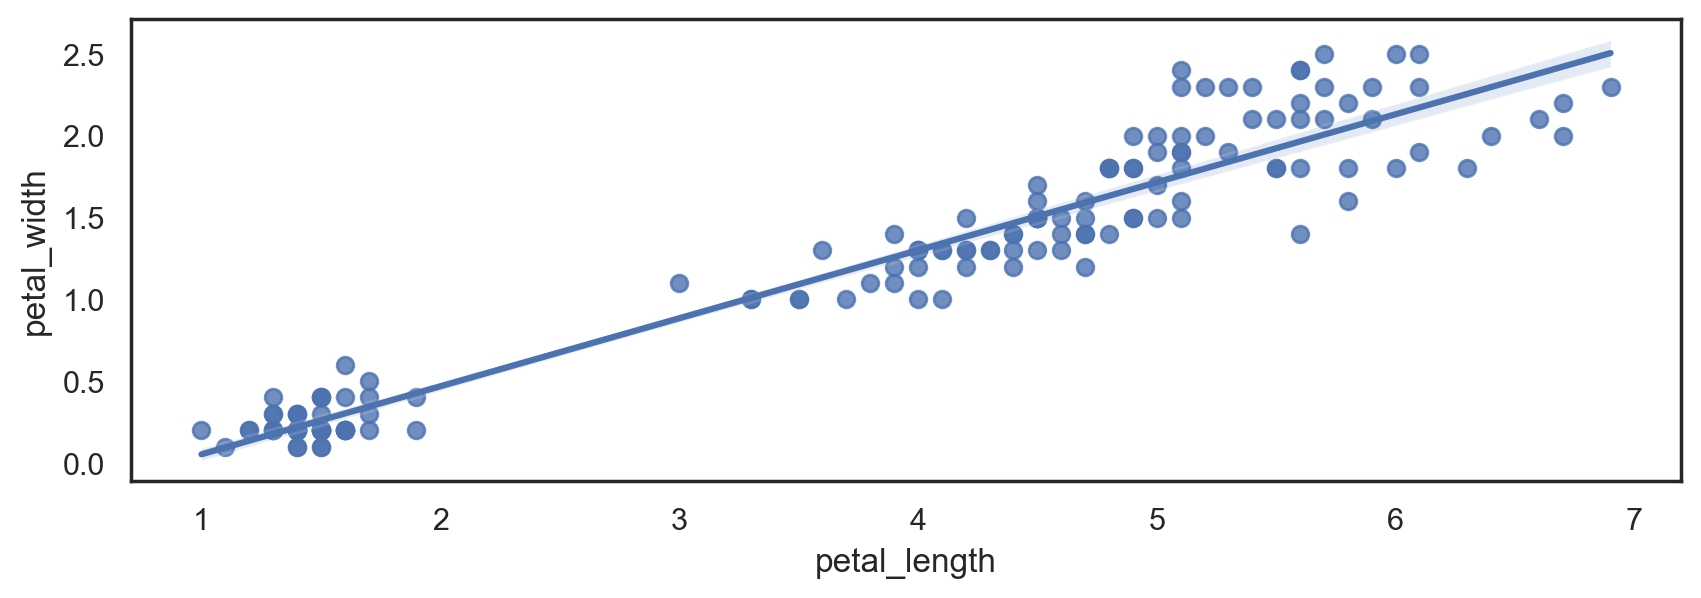

In [94]:
# 회귀 그래프 : regplot(hue 사용 불가), lmplot(hue 사용 가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

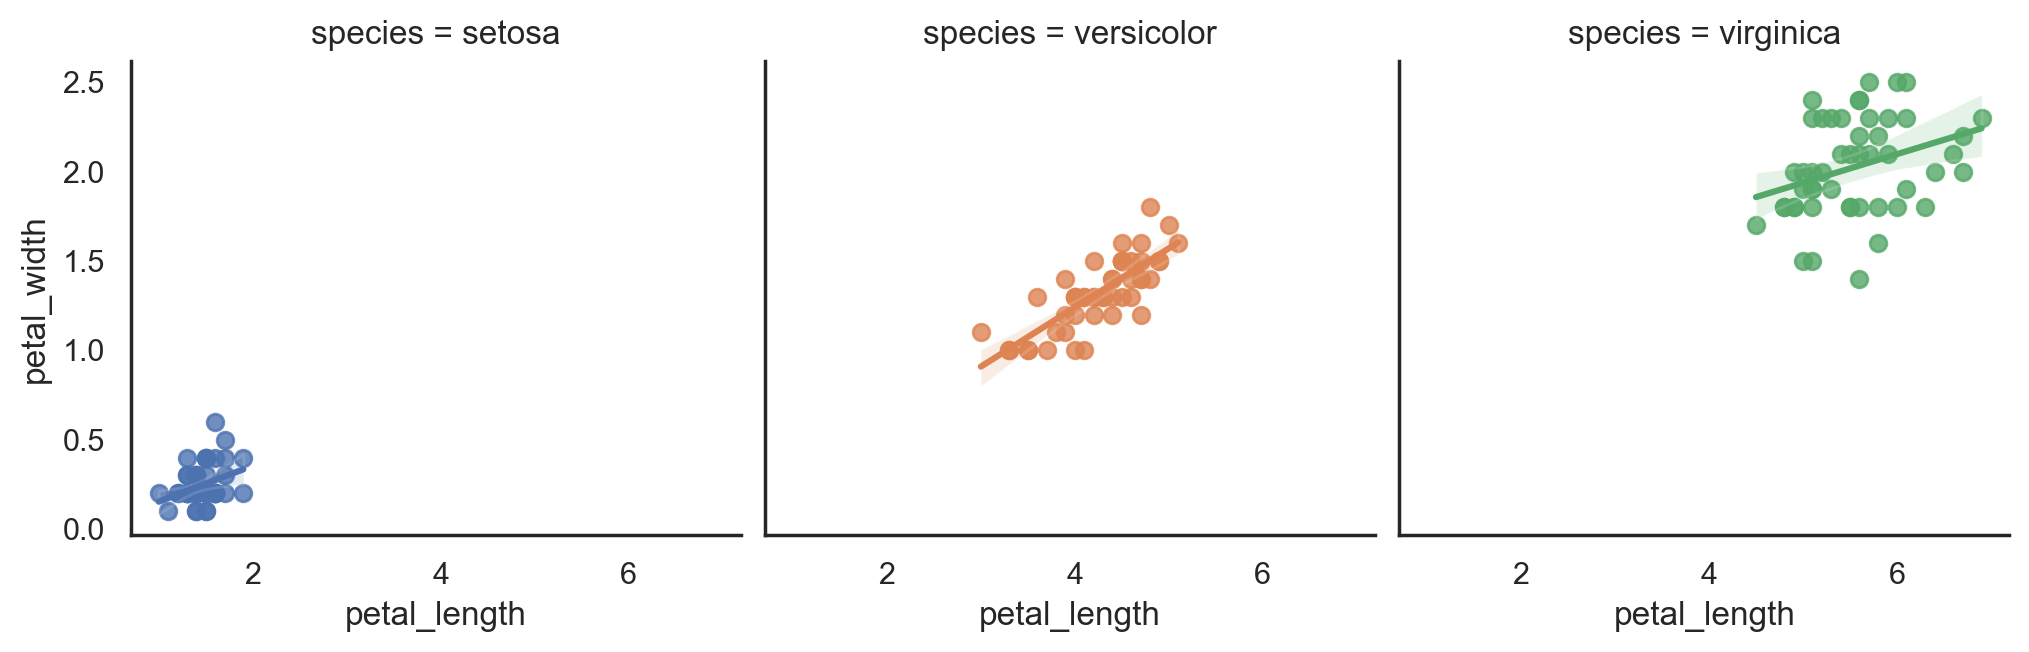

In [96]:
g = sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species', col='species')
g.fig.set_size_inches(10,3)
plt.show()

## 2.4.다중 그래프를 위한 FacetGrid

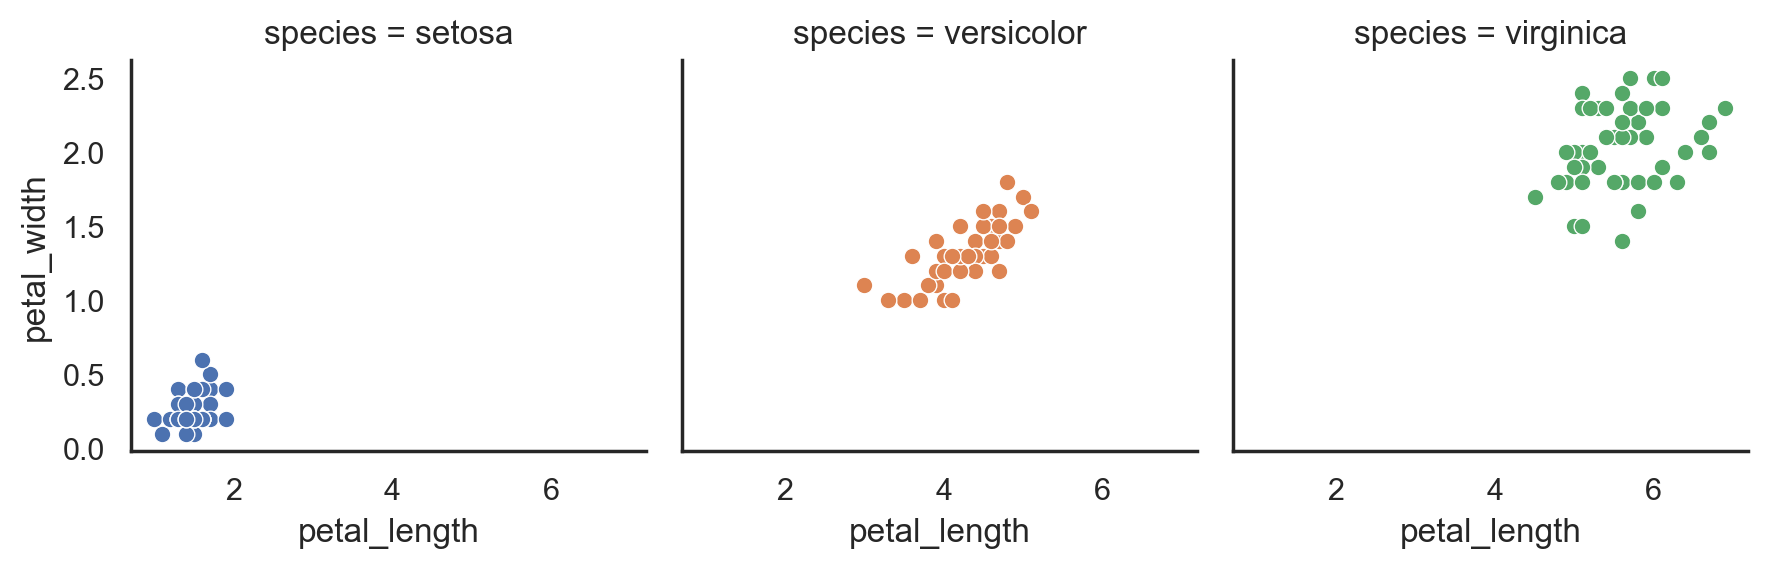

In [97]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

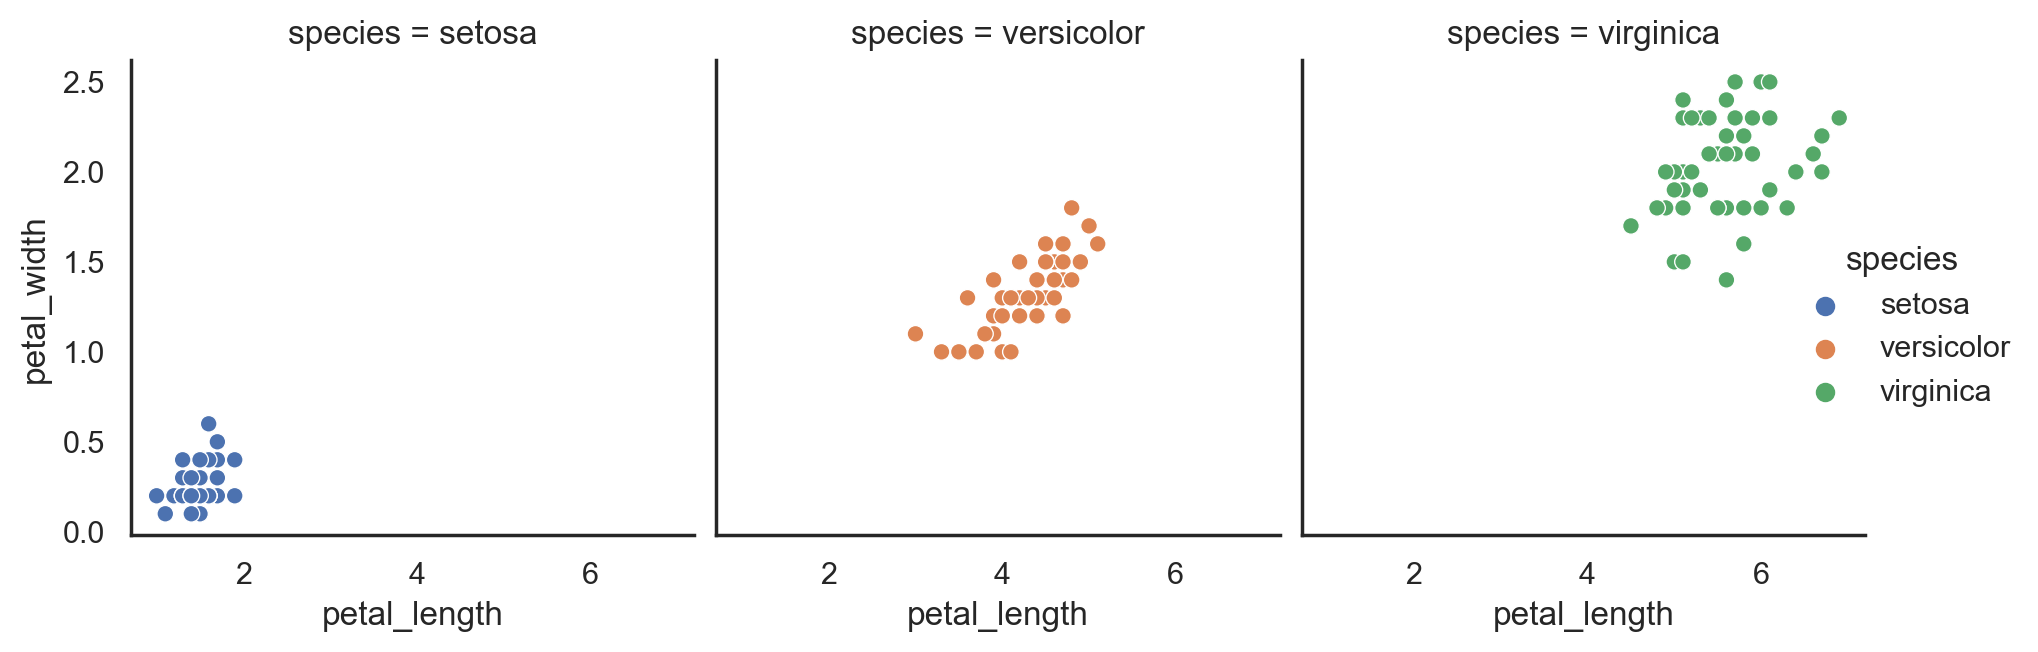

In [99]:
g = sns.relplot(iris, x='petal_length', y='petal_width', col='species', hue='species')
g.fig.set_size_inches(10,3)
plt.show()